<a href="https://colab.research.google.com/github/palmcorp/AOSP-ICSAce/blob/master/Copy2_of_Cardiac_Patterns_training_rcnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

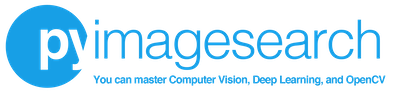

# R-CNN object detection with Keras, TensorFlow, and Deep Learning
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [R-CNN object detection with Keras, TensorFlow, and Deep Learning](https://www.pyimagesearch.com/2020/07/13/r-cnn-object-detection-with-keras-tensorflow-and-deep-learning/) blog post published on 2020-07-13.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Install the necessary packages

In [1]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 3.5 kB/s 
     |████████████████████████████████| 2.9 MB 63.7 MB/s 
     |████████████████████████████████| 454 kB 86.5 MB/s 
     |████████████████████████████████| 3.0 MB 65.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


### Download the code zip file

In [2]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/training-rcnn-keras/training-rcnn-keras.zip
!unzip -qq training-rcnn-keras.zip
%cd training-rcnn-keras

--2022-06-06 21:59:51--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/training-rcnn-keras/training-rcnn-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.168.137
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.168.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328358964 (313M) [binary/octet-stream]
Saving to: ‘training-rcnn-keras.zip’

training-rcnn-keras 100%[===================>] 313.15M  34.5MB/s    in 9.7s    

2022-06-06 22:00:02 (32.2 MB/s) - ‘training-rcnn-keras.zip’ saved [328358964/328358964]

/content/training-rcnn-keras


In [3]:
'''
print ("placeholder for subroutines")
# create log
import logging
# from: https://colab.research.google.com/github/aviadr1/learn-advanced-python/blob/master/content/15_logging/logging_in_python.ipynb#scrollTo=AIOKuVYlR52k
log = create_log()
import time
d = time.gmtime()
msg = "Cardiac Patterns Log started at"+ str (d)
log.info (msg)
print (msg)
'''
import datetime
import os
def create_log():
  log_name = "cp.log"
  log_base = os.path.join ("/content","training-rcnn-keras")
  log_path = os.path.join (log_base, log_name)
  logger = logging.getLogger("CP_logger")
  logging.basicConfig(
      filename=log_path,
      filemode='w',
      level=logging.DEBUG,
      format='%(name)s - %(levelname)s - %(message)s'
      )
  #logging.basicConfig()
  logging.debug("set up cp log")
  logging.info("This will get logged")
  # try fle
  CP_LOG_NAME = "CP_log.txt"
  CP_LOG = os.path.join (log_base, CP_LOG_NAME)
  fp = open (CP_LOG,'a')
  dt= datetime.datetime.now()
  msg=" CARDIAC PATTERNS LOG From "+str (dt)+"\n"
  fp.write (msg)
  #fp.close ()

  print ("CP log set up using text file:", CP_LOG_NAME)
  return logging,fp
def lg(TEXT):
  dt = datetime.datetime.now()
  msg = str (dt)+TEXT+"\n"
  fp.write (msg)
  return

print ("placeholder for subroutines")
# create log
import logging
import pdb
# from: https://colab.research.google.com/github/aviadr1/learn-advanced-python/blob/master/content/15_logging/logging_in_python.ipynb#scrollTo=AIOKuVYlR52k
log, fp = create_log()
import datetime
t = datetime.datetime.now()
msg = "Cardiac Patterns Log started at"+ str (t)
log.info (msg)
print (msg)
#log.shutdown()
#pdb.set_trace()
#log.close()
print ("lg test")
##msg= "text for log"
lg(msg)
#for i in range (0,10):lg(msg+" "+str(i))


placeholder for subroutines
CP log set up using text file: CP_log.txt
Cardiac Patterns Log started at2022-06-06 22:00:07.296463
lg test


## Blog Post Code

### Import Packages

In [4]:
# import the necessary packages
# UPGRDE Keras?
UPGRADE = False
if UPGRADE:
  !pip install keras=2.9   # added for CP
from pyimagesearch.nms import non_max_suppression
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from bs4 import BeautifulSoup
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [5]:
# update keras
#print ("updating Keras for Cardiac Patterns")
#!pip install -U tensorflow
#import tensorflow as ttf
#print (" Running version of Keras: ",ttf.keras.__version__)

### Function to display images in Jupyter Notebooks and Google Colab

In [6]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()
def plt_imshow2(title, image, subtitle):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.xlabel(subtitle)
	plt.show()
	return

### Implementing our object detection configuration file

In [7]:
class Config:
    # define the base path to the *original* input dataset and then use
    # the base path to derive the image and annotations directories
    ORIG_BASE_PATH = "raccoons"
    ORIG_IMAGES = os.path.sep.join([ORIG_BASE_PATH, "images"])
    ORIG_ANNOTS = os.path.sep.join([ORIG_BASE_PATH, "annotations"])

    # define the base path to the *new* dataset after running our dataset
    # builder scripts and then use the base path to derive the paths to
    # our output class label directories
    BASE_PATH = "dataset"
    POSITVE_PATH = os.path.sep.join([BASE_PATH, "raccoon"])
    NEGATIVE_PATH = os.path.sep.join([BASE_PATH, "no_raccoon"])

    # define the number of max proposals used when running selective
    # search for (1) gathering training data and (2) performing inference
    MAX_PROPOSALS = 2000
    MAX_PROPOSALS_INFER = 200

    # define the maximum number of positive and negative images to be
    # generated from each image
    MAX_POSITIVE = 30
    MAX_NEGATIVE = 10

    # initialize the input dimensions to the network
    INPUT_DIMS = (224, 224)
    # define the path to the output model and label binarizer
    MODEL_PATH = "raccoon_detector.h5"
    ENCODER_PATH = "label_encoder.pickle"
    ## extension for CP  
    MODELT_PATH = "echo_detector.h5"
    ENCODERT_PATH= "echo_encoder.pickle"
   

    # define the minimum probability required for a positive prediction
    # (used to filter out false-positive predictions)
    MIN_PROBA = 0.99

# instantiate our Config object
config = Config()

### Measuring object detection accuracy with Intersection over Union (IoU)

In [8]:
def compute_iou(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])

	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the intersection area
	iou = interArea / float(boxAArea + boxBArea - interArea)

	# return the intersection over union value
	return iou

### Implementing our object detection dataset builder script

In [9]:
# loop over the output positive and negative directories
for dirPath in (config.POSITVE_PATH, config.NEGATIVE_PATH):
	# if the output directory does not exist yet, create it
	if not os.path.exists(dirPath):
		os.makedirs(dirPath)

# grab all image paths in the input images directory
imagePaths = list(paths.list_images(config.ORIG_IMAGES))

# initialize the total number of positive and negative images we have
# saved to disk so far
totalPositive = 0
totalNegative = 0

In [10]:
# REPEAT OF PREVIOUS STEP?
# loop over the output positive and negative directories
'''
for dirPath in (config.POSITVE_PATH, config.NEGATIVE_PATH):
	# if the output directory does not exist yet, create it
	if not os.path.exists(dirPath):
		os.makedirs(dirPath)

# grab all image paths in the input images directory
imagePaths = list(paths.list_images(config.ORIG_IMAGES))

# initialize the total number of positive and negative images we have
# saved to disk so far
totalPositive = 0
totalNegative = 0
'''

'\nfor dirPath in (config.POSITVE_PATH, config.NEGATIVE_PATH):\n\t# if the output directory does not exist yet, create it\n\tif not os.path.exists(dirPath):\n\t\tos.makedirs(dirPath)\n\n# grab all image paths in the input images directory\nimagePaths = list(paths.list_images(config.ORIG_IMAGES))\n\n# initialize the total number of positive and negative images we have\n# saved to disk so far\ntotalPositive = 0\ntotalNegative = 0\n'

### Fine-tuning a network for object detection with Keras and TensorFlow

In [11]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--plot", type=str, default="plot.png",
#	help="path to output loss/accuracy plot")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"plot": "plot.png"
}

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 5
BS = 32
BS = 2  # Adjusted per Adiren's advice 6/4/22
BS = 16 # 2nd try 6/4/22
BS = 8  # 3rd try
BS = 4  # 4th try

In [12]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
STAGE = "ZERO"
MISSION = " Create local directory structures"
TWOLABELS = True # true if only two lablel
if TWOLABELS:
  MISSION+= " \n ADDED ELIGIBLE LIST OF ANNOTATIONS \n"
print ("\n\nTHIS IS CARDIAC PATTERNS STAGE ",STAGE,"\n\n", MISSION, "\n")
log_file = os.path.join("/content","training-rcnn-keras","CP_log.txt")
log,fp = create_log()  # may have already been created
print (" Tensorflos & system lot at: cp.log and CP log at CP_log.txt")
log.info (STAGE)
log.info (MISSION)
fp.write(STAGE+ "\n")
fp.write(MISSION+"\n")
import shutil
import pdb
def cpy (SOURCE,DESTINATION):
  # copies all files form source to destination
  # full paths requried
  # tests for existance
  S=SOURCE
  D=DESTINATION
  if not os.path.isdir(S) :
    print (S, " doesnt exist exiting")
    return False
  if not os.path.isdir (D):
    print (D, "doesnt exist")
  files = os.listdir(S)
  print ("found ", len(files), "  files in ", S)
  #pdb.set_trace()
  try:
    #shutil.copytree(S,D)
    #shutil.copy(S,D)
    for f in files:
      src= os.path.join (S,f)
      dst= os.path.join (D,f)
      shutil.copy(src,dst)
  except Exception as ex:
    print ("Exception error: ", ex)
    return False
  print (len(files)," files copied")
  return True



  
def make_base(dir_base):
  if not os.path.exists(dir_base):
    os.mkdir(dir_base)
    print ("Directory ", dir_base, " created")
  else:
    print (dir_base, " exists")
    msg= " Directory " +str(dir_base) + "exists"
    lg(msg)
  return
def make_subs(dir_base,sub_list):
  for d in sub_list:
    DP=os.path.join(dir_base,d)
    try:
      os.mkdir(DP)
    except Exception as EX:
      #FileExistsError:
      #print (d, "already exists")
      msg="Directory Exception for base: "+ str(dir_base)+ " and "+ str(d)+ " ERROR: "+ str(EX)
      #msg=" Subdirectory "+str(d)+ " exists already"
      lg(msg)
      print (msg)
    print ("created ",DP)
  return
print (" THIS IS CARDIAC PATTERNS - SETUP STAGE:", STAGE)
print ("make dirs under echos")
print ("Creataing label dirctories for Cardiac Patterns")
msg="Creataing label dirctories for Cardiac Patterns - Usng LG"
lg(msg)
dir_list = ["Invisible","Normal","Mild","Severe","Endocarditis","Prosthetic"]
if TWOLABELS:
  # split into two
  #dir_list = ["Invisible","Normal"]
  dir_list = ["Invisible","Severe"] #updated for test 06-06-22
  omit_list= ["Mild","Normal","Endocarditis","Prosthetic"] # The Rest those annotations ommited from this run
equiv = [0,1,2,3,4,5]
print ("\n Severity directories ", dir_list)
print (" \n equivalent values ", equiv, "\n")
dlstr = str (dir_list)
log.info ("\n Severity directories "+dlstr)
msg="\n Severity directories - using fp "+str( dir_list)+"\n"
fp.write(msg)
dir_base = 'echos'
make_base(dir_base)
print ("make dirs under echos")
make_subs(dir_base,dir_list)
if TWOLABELS:
  msg=" Limiting directories to"+str(dir_list)
  msg+=" \n Ommiting the following: "+str(omit_list)
  lg(msg)
  print (msg)
print ("creating files under echo")
echo_dirs=["annotations", "images"]
echo_base = os.path.join("/content","training-rcnn-keras","echo")
make_base(echo_base)
make_subs (echo_base, echo_dirs)
print("Taking care of annotations - movement is in Stage ONE")
msg="Annotation move for multiple contributors moved to Stage ONE"
lg(msg)
#S=os.path.join ("/content","drive","MyDrive","CardiacEchos","annotations")
#D=os.path.join ("/content","training-rcnn-keras","echo","annotations")
#cpy (S,D)
print ("ALL DONE", " \n CRDIAC PATERNS STAGE ", STAGE)



THIS IS CARDIAC PATTERNS STAGE  ZERO 

  Create local directory structures 
 ADDED ELIGIBLE LIST OF ANNOTATIONS 
 

CP log set up using text file: CP_log.txt
 Tensorflos & system lot at: cp.log and CP log at CP_log.txt
 THIS IS CARDIAC PATTERNS - SETUP STAGE: ZERO
make dirs under echos
Creataing label dirctories for Cardiac Patterns

 Severity directories  ['Invisible', 'Severe']
 
 equivalent values  [0, 1, 2, 3, 4, 5] 

Directory  echos  created
make dirs under echos
created  echos/Invisible
created  echos/Severe
 Limiting directories to['Invisible', 'Severe'] 
 Ommiting the following: ['Mild', 'Normal', 'Endocarditis', 'Prosthetic']
creating files under echo
Directory  /content/training-rcnn-keras/echo  created
created  /content/training-rcnn-keras/echo/annotations
created  /content/training-rcnn-keras/echo/images
Taking care of annotations - movement is in Stage ONE
ALL DONE  
 CRDIAC PATERNS STAGE  ZERO


In [14]:
# Auxilaryy to test if annotation is in 'eligible ' list
def test_valid (SOURCE_ANNO_PATH):
  LTEST=False
  src=SOURCE_ANNO_PATH
  try:   # test for Uniqcode and improper file names
    contents = open(src).read()  # grab contents
  except Exception as EX:
    msg="STEP ONE: Improper character or path for "+str(one_anno_path)
    lg(msg)
    print (msg)
    return False
  soup = BeautifulSoup (contents, "html.parser") # convert to soup
  label=soup.find ('difficult').string
  if LTEST: pdb.set_trace()
  if label in omit_list:
    # not ellible
    msg="Label: "+str(label)+" in ommitted list"
    lg(msg)
    print (msg)
    return False
  else:
    if LTEST: print ("found ",label, " in ", src)
    return True
'''if test_valid ("path"):
  print ('valid')
else:
    print ("not valid")
'''

'if test_valid ("path"):\n  print (\'valid\')\nelse:\n    print ("not valid")\n'

In [15]:
STAGE= "ONE ( v2 [multiple contributors])"
MISSION = " Bring referenced videos from Docs into local vm & check annotations"
if TWOLABELS: 
  MISSION+= " \n Limited labels to: "+str(dir_list)
STAGE_VERSION="v2 with multiple contributors"
#print ("THIS IS CARDIAC PATTERNS STAGE ", STAGE,"\n", MISSION ,"\n", STAGE_VERSION)
#log.info (STAGE)
#log.info (MISSION)
msg=str(STAGE)+"\n"+str(MISSION)+"\n"+str(STAGE_VERSION)
#lg (STAGE + "\n"+MISSION+"\n"+str(STAGE_VERSION))
lg(msg)
print (msg)
import os
import  pdb
ECHO = False # echo messages on print
#from google.colab import drive
print ("Already Imported google docs")
LTEST=False
#drv=os.path.join ('/content','gdrive')
#drive.mount (drv)
#arr=os.listdir(drv)
##print (arr)
drv= "drive"
echox = os.path.join("/content","drive","MyDrive","CardiacEchos","Videos")
source_video_path = echox  # clarify names
all_vids=os.listdir(echox)  # this is 10,000 videos
numvids = len(all_vids)
print (" \n ", numvids, " videos located in Google Docs \n Processing those referenced in annotations")
msg=" \n "+str( numvids)+ " videos located in Google Docs \n Processing those referenced in annotations"
lg(msg)
nvids = 25
ALLVIDS = True  # process all vids
NAMED_SUB = 'paul'
#NAMED_sUB = 'sharol'  # these are ones to use # list of 
SUB_NAMES = ['paul1', 'sharol2'] # lsit of authors
msg = "Moving annotations from these sub dirctories: "+ str(SUB_NAMES)
lg(msg)
x=0
if numvids > nvids  : # too large dont print
  print ("not limiting vid list to ", nvids)
else:
  for v in all_vids:
    print (v)
    x+=1
    if x>nvids: break
annox = os.path.join("/content","drive",'MyDrive','CardiacEchos','annotations')

#print ("ths it for the list, now move annotated files")
msg="STAGE ONE + : check annotations and move to echos directory "
lg(msg)
print (msg)
ref_annos = [] # build this
local_annos = os.path.join ("/content","training-rcnn-keras","echo","annotations")
src_anno_base   = os.path.join ("/content","drive","MyDrive","CardiacEchos","annotations")
all_annos = os.listdir(local_annos) # this will be empty
all_src_annos = os.listdir(src_anno_base)  # chek full path to source videos doesnt check subdirectories
Num_src_anno  = len (all_src_annos) # how many annotations in google docs
print (Num_src_anno, " annotations found in main source direcgory")

msg="Annotations found in primary source location: "+str(Num_src_anno)
lg(msg)
print (msg)
local_image_path = os.path.join ("/content","training-rcnn-keras","echo","images") # full path to local videos
local_anno_base  = os.path.join ("/content","training-rcnn-keras","echo","annotations") # full path to local copies
if LTEST: pdb.set_trace()
drive_image_path = os.path.join ("/content","drive","MyDrive","CardiacEchos","Videos")
# create  list of requested annotations by path
src_anno_paths = []  # paths to all annotations from source
doc_anno_path = os.path.join ("/content","drive",'MyDrive','CardiacEchos','annotations')
# collect paths to all annotations from source
src_anno_paths=[] # start with blank list
for u in SUB_NAMES:  # named contibuters
  anno_sub_path = os.path.join (src_anno_base, u)# add contriuter's name to soruce path
  # get list under this sub directory
  anno_sub_list = os.listdir (anno_sub_path)# list of file names in this subdirctory
  # full path to each annotation
  this_path_list = [] # start with zero
  for f in anno_sub_list:
    this_path_list.append(os.path.join (anno_sub_path, f))
    # this list contians full path to all annos in this sub directory
  src_anno_paths.extend (this_path_list)  # accululate master list
tot_annos = len(src_anno_paths)
msg = " Total annotation paths: "+str(tot_annos)
lg(msg)

# cycle through all annotation paths
# check if file exists
# check format and content of annotation
# move to local annotation directory
ncpy=0
LTEST=False
unknown_vids =[]
bad_annos    =[]
if TWOLABELS:
  omit_annos = []  # list of ommitted
  nanno_ommit=0    # count
nanno_moved=0 # keep count
#for a in all_annos:  # use src paths instead
for ap in src_anno_paths:
  # get soup
  # get file name
  #one_anno_path = os.path.join(local_annos,a)
  one_anno_path = ap
  if LTEST: pdb.set_trace()
  if not os.path.isfile (one_anno_path): # some problm
    print ("Hm.. ", one_anno_path, " is not a file?")
    bad_annos.append(one_anno_path)
    #break # not break
    continue
    # read annotation
  try:   # test for Uniqcode and improper file names
    contents = open(one_anno_path).read()  # grab contents
  except Exception as EX:
    msg="STEP ONE: Improper character or path for "+str(one_anno_path)
    lg(msg)
    print (msg)
    continue
  # extract just the name for this annotatoin
  anno_name = os.path.basename (one_anno_path)
  msg= str(STAGE)+" retrieved contents for annotation: "+ str(anno_name)
  lg(msg)
  print (msg)
  # omit this test
  
  # test for valid annotation
  soup = BeautifulSoup (contents, "html.parser") # convert to soup
    # get the avi file name
  if LTEST: pdb.set_trace()
  filetag =soup.find ('filename')
  if filetag ==""  :  # some problem
  #if not soup.has_attr ("filename") : # some problem
    bad_annos.append (one_anno_path)
    msg=" Improperly formmated annotation: no filename "+str(one_anno_path)
    lg(msg)
    continue
  try:
    filename =str(soup.find ("filename").string)  # remoed for v2
  except Exception as ex:
    #pdb.set_trace()  # why
    msg = "Exception in soup extraction for filename in "+str(ap)+ " was" +str(ex)
    print (msg)
    lg(msg)
    continue
    ## Annotation passed tests, move to loacal
  local_anno_path = os.path.join (local_anno_base,anno_name) # full path to local copy
  source_anno_path= one_anno_path  # full path to souce
  #### TEST FOR TWOLABELS
  if TWOLABELS:
    if not test_valid (source_anno_path): # test this annotation 
      # not valid
      omit_annos.append (source_anno_path)# addd to list of ommitted 
      nanno_ommit+=1    # count
      break # quit at this point
  try:
      shutil.copy (source_anno_path, local_anno_path) # note Full Paths
      msg=" copied "+str(source_anno_path)+ " to "+str(local_anno_path)
      lg(msg)
      if ECHO: print (msg)
  except Exception  as EX:
      msg=" Exception error "+str(EX)+" copying from"+str(source_anno_path)+ " to" + str(local_anno_path)
      lg(msg)
      if ECHO: print (msg)
  nanno_moved +=1
    #ove annotaiotn
  msg="Annotation "+str()+ " moved to "+ str ()
  lg(msg)
  if ECHO: print (msg)
  msg = str(nanno_moved)+ " Annotations moved"
  lg(msg)
  if ECHO: print (msg)
  # at this point:
  # anno_name = the name of the annotation
  # filename  = the name of the video file from the annotation
  #filename = str(soup.find ('filename'))  # above is corredt
  # construt the destination name to store the annotation
  #src = os.path.join (drive_image_path, filename)
  dst_anno_path = os.path.join(local_annos,anno_name ) # destination to save ananotation
  dst_video_path= os.path.join ("/content","training-rcnn-keras","echo","images")
  QUE=False
  ## COPY VIDEO TO echo/images
  src= os.path.join (source_video_path, filename) # move this file into local must be a contributors
  if not os.path.isfile(src):  # check to see if the source video exists
    print ('unknown video', src, " annotation: ",ap)
    unknown_vids.append(src)
    bad_annos.append(src)
    #break
    Que = True  # some question
    continue # not break
  #dst_video = os.path.join( local_image_path, filename)
  #src_video =#
  #cpy (src,dst)
  dst=dst_video_path  # note: no subdirectories here
  if not QUE: 
    shutil.copy(src,dst) # try this instead only if no question
    print ("video ", filename, " copied from ", src, " to ",dst)
    msg="video"+str(filename)+ " copied from "+str(src)+" to "+str(dst)
    lg(msg)

  ncpy+=1
###
# COMPLETION OF ANNOTATION CHEKING/MOVING AND VIDEO MOVING
print ("all ", ncpy, " referenced images copied to: ",local_image_path)
print (len(unknown_vids), " Unknonn vids: ",unknown_vids)
print (len(bad_annos), " bad annotations found:", bad_annos)
print (" \n END OF STAGE ", STAGE)
msg = "all "+str( ncpy)+ " referenced images copied to: "+ str(local_image_path)
log.info (msg)
msg+=" for lg"
lg(msg)
lnv=str(unknown_vids)
msg = " Unknown vids: "+ lnv
log.info (msg)
msg+=" for lg"
lg(msg)
bda=str(bad_annos)
msg=str(len(bad_annos))+ " bad annotations found "+ bda
log.info (msg)
msg+=" from lg "
lg(msg)
msg+" \n END OF STAGE "+str(STAGE)
if TWOLABELS:
      msg=" OMITTED ANNOTATIONS: "+str(omit_annos)# added to list of ommitted 
      msg+=" \n Number: "+str(nanno_ommit)
      print (msg)
log.info (msg)
msg+= " from lg"
lg(msg)
msg= "all "+str( ncpy)+ " referenced images copied to: "+ str(local_image_path)
lg(msg)

ONE ( v2 [multiple contributors])
 Bring referenced videos from Docs into local vm & check annotations 
 Limited labels to: ['Invisible', 'Severe']
v2 with multiple contributors
Already Imported google docs
 
  10034  videos located in Google Docs 
 Processing those referenced in annotations
not limiting vid list to  25
STAGE ONE + : check annotations and move to echos directory 
81  annotations found in main source direcgory
Annotations found in primary source location: 81
ONE ( v2 [multiple contributors]) retrieved contents for annotation: B253B-0.17.xml
unknown video /content/drive/MyDrive/CardiacEchos/Videos/raccoon-1.jpg  annotation:  /content/drive/MyDrive/CardiacEchos/annotations/paul1/B253B-0.17.xml
ONE ( v2 [multiple contributors]) retrieved contents for annotation: CD966-0.17.xml
video  0X1A0A263B22CCD966.avi  copied from  /content/drive/MyDrive/CardiacEchos/Videos/0X1A0A263B22CCD966.avi  to  /content/training-rcnn-keras/echo/images
ONE ( v2 [multiple contributors]) retrieved

In [16]:
STAGE= "TWO"
MISSION = "Subroutne to convert to jpg and Move videos to labeled directories "
print ("\n\n THIS IS CRDIAC PATTERNS MOVE TO LABELS\n\n", "STAGE ",STAGE, "\n", MISSION, "\n")

lgi="\n\n THIS IS CRDIAC PATTERNS MOVE TO LABELS\n\n"+ "STAGE "+str(STAGE)+ "\n"+str(MISSION)+ "\n"
log.info(lgi)
def move_to_label (SEVERITY,ANNO, IMAGE_NAME):
  # ECHOS should be a global
  # moves an avi into the lagel catagory
  #diagnosis= DIAGNOSIS  # local copy
  severity = SEVERITY # local 
  anno = ANNO  # soupi fied
  #img_path = IMAGE_PATH  # full path to image
  # move FROM ECHOS to LABELS NO
  ECHOS= os.path.join ("/content","gdrive","MyDrive","CardiacEchos","Videos",IMAGE_NAME) # catagorized destination
  # NOTE SHOULD BE MOVING JPG NOT AVI
  img_path =ECHOS
  label_path = os.path.join ("/content","training-rcnn-keras","echos",severity)
  if not os.path.isdir(label_path):
    print (label_path, "not a directpry, exiting")
    return False
  # move source
  if not os.path.isfile(img_path):
    print (img_path, "doesnt exist exiting")
    return False
  # move source to destination
  S=img_path
  D=label_path
  cpy (S,D)
  print ("Moved ",S, " to ", D)
  return




 THIS IS CRDIAC PATTERNS MOVE TO LABELS

 STAGE  TWO 
 Subroutne to convert to jpg and Move videos to labeled directories  



In [17]:
# cardiac patterns  ( DEPRICATED)
'''
print ("This is to move refernced vids to local _images STEP THREE")
anno_list = []
anno_dir  = os.path.join ("/content/training-rcnn-keras/echo/annotations")
image_dir = os.path.join ("/content/training-rcnn-keras/echo/images")
anno_list = os.listdir (anno_dir)
'''
# NOT DONE

'\nprint ("This is to move refernced vids to local _images STEP THREE")\nanno_list = []\nanno_dir  = os.path.join ("/content/training-rcnn-keras/echo/annotations")\nimage_dir = os.path.join ("/content/training-rcnn-keras/echo/images")\nanno_list = os.listdir (anno_dir)\n'

In [18]:
#CARDIAC PATTERN STAGE FOUR
from bs4 import BeautifulSoup
import cv2
from os.path import exists
from shutil import copyfile
from sys    import exit
from pathlib import Path
import pdb
STAGE = "FOUR"
MISSION= "move images to labeled drive and convert to jpg"
print ("\n\n THIS IS CARDIAC PATTERNS STAGE ",STAGE,"\n",MISSION,"\n\n")
#log.info (STAGE)  # Dont use log.info temporrily
#log.info (MISSION)
#log.info ( "\n\n THIS IS CARDIAC PATTERNS STAGE ",STAGE,"\n",MISSION,"\n\n")
msg = "\n\n THIS IS CARDIAC PATTERNS STAGE "+str(STAGE)+"\n"+str(MISSION)+"\n\n"
lg(msg)  # eliminate temporarily
bad_anno = []  # these files need work
bad_paths=[]
missing_avi =[]
def cpy (source_path, dest_path):
  try:
    copyfile(source_path, dest_path)
  except:
    print ("Unable to copy from ",source_path, " to ", dest_path)
    return False
  return True
# copy file from docs to local directory
def show_avi(full_path):
  vidcap=cv2.VideoCapture(full_path)
  success,image = vidcap.read()
  count =0
  while success:
    cv2.imwrite("frame%d.jpg" % count, image)
    success,image = vidcap.read()
  return
  # convert avi to jpg and grabe one frame
# v2 of avi2jpg
#  OUT_PATH is only to JPG directory
# returns frame id

def avi2jpg(full_path, FRAME, JPG_OUT_PATH):
  print ("converting ", full_path, "to jpg, picking FRAME:",FRAME, "deposit at ", JPG_OUT_PATH)
  import cv2
  LTEST = False
  MTEST = False
  #vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
  vidcap  = cv2.VideoCapture (full_path)
  success,image = vidcap.read()
  count = 0
  if MTEST: pdb.set_trace()
  while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file  
    if count == FRAME:
      #isolate tag
      fn = to_path.find ("avi")
      tag = to_path[fn-6:fn-1]+"-"
      frame_id = "frame%d.jpg" % count
      x=frame_id.replace ("frame",tag)
      frame_id = x
      #frame_id = %d.jpg" % count
      #frame_id = str(tag)+"_"+frame_id
      if MTEST:pdb.set_trace
      #frame_id = "frame%d.jpg" % count
      #jpg_path = os.path.join(OUT_PATH,frame_id)  
      #op=OUT_PATH.split(os.path.sep)[0:4]  # first part but as a list
      op=JPG_OUT_PATH
      #for p in op: jpg_path = os.path.join (p)
      jpg_path = os.path.join (op,frame_id)
      if LTEST: print (count, "writing jpg to:",jpg_path)  
      cv2.imwrite(jpg_path, image)
      break # quit this loop
    success,image = vidcap.read()
    print(count, 'Read a new frame: ', success)
    count += 1

  print ('found frame ', FRAME, " and wrote to:",jpg_path)
  return frame_id

  
def show_echo(label, FULL_PATH):
  print ("loading : ", FULL_PATH)
  imagePath = FULL_PATH
  localPath =os.path.join ("/content","training-rcnn-keras","echo","images","TEMP")
  if not cpy (imagePath,localPath):
    print ( " cant") 
    return False
  if not exists (localPath):
    print ("doesnt exist ", localPath)
    return
  image = cv2.imread(localPath)
  title = label
  if os.stat(localPath).st_size ==0:
    print ("empty file: ", localPath)
  else:
    #plt_imshow(title, image)
    #show_avi (localPath)
    show_avi_colab (localPath)

  return
import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow 
def show_avi_colab(FULL_PATH):
  avi_p=FULL_PATH
  print (" avi file: ",avi_p)
  cap = cv2.VideoCapture(avi_p)
  display_time = 10 # sec
  file_size = os.path.getsize(avi_p)
  start_time = time.time()
  print ("Start time: ", start_time, " didplay time:", display_time, "size: ", file_size)
  NVIDS = 5 # show this many
  while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    print ("now:", time.time())
    elapsed_time = time.time()-start_time
    etime=elapsed_time * 1000
    if elapsed_time > display_time: break
    print ("elapsed time:", elapsed_time, " etime: ", etime)    
    NVIDS-=1
    if NVIDS >=0 : break
  cap.release()
  cv2.destroyAllWindows()
  return



from google.colab.patches import cv2_imshow  
def show2_avi (img ):
  cv2_imshow(img)
  return

def check_anno (ANNO, ap):
  # run some checks
  try:
    w = int(soup.find  ("width").string)
    path     = str(soup.find ("path").string)
    folder   = str(soup.find ("folder").string)
    label    = str(soup.find ("name").string)
    diagnosis= str(soup.find ("difficult").string) # atually "name"
    severity = str(soup.find ("difficult").string)
  except Exception as EX:
    msg=" Improper or incomplete annotation " + " at "+ str(ap) + "excpetion: "+ str(EX)
    lg(msg)
    return False
  return True  # this one is OK


LTEST=False
#print ("\n\n THIS IS CARDIAC PATTERNS STAGE FOUR\n move images to labeled dir\n\n")
soup = BeautifulSoup (contents,"html.parser")
gtBoxes =[]  # empty list
bad_anno=[]
EXO= True# print stuff
print ("Process echo annotations and move files")
Anno_dir = os.path.join ('/content/','training-rcnn-keras','echo','annotations')
list_anno = os.listdir(Anno_dir)
VID_PATH = os.path.join ("/content","gdrive","MyDrive","CardiacEchos","Videos",)
LOCAL_VID_PATH = os.path.join ("/content","training-rcnn-keras","echo","images") # THESE ARE AVI
LABEL_VID_PATH = os.path.join("/content","training-rcnn-keras","echos")  # THESE ARE JPG
ECHOS=LABEL_VID_PATH # where we store the echos by severity
anno = 10
AVI = False  # if true will also move avi
elabels=[]  # empty list
if LTEST:pdb.set_trace()
for a in list_anno:
  # read anno
  print ("\nprocessing: ",a)
  msg="processing : "+str(a)
  lg(msg)
  if a.find ('.xml') == -1 : # this is not an annotation file
    print ("ERROR, NOT AN XML FILE: ", a, " skipping")
    bad_anno.append (a)
    continue
  anno_path = os.path.join (Anno_dir,a)
  contents = open(anno_path).read()
  soup     = BeautifulSoup(contents, "html.parser")
  ANNO     = soup # for later
  #pt=BeautifulSoup.prettify
  #print (pt)
  # run check on this annotaton
  if not check_anno (ANNO, anno_path): # quitt early
    #msg="Improper annotation skipping "+str(anno_path)
    #lg(msg)
    continue
  gtBoxes = []
  w = int(soup.find  ("width").string)
  h = int(soup.find ("height").string)
  filename = str(soup.find ("filename").string)
  if filename.find ("raccoon") != -1: 
    print (a," ",filename, " has  raccoon  so ommitting")
    if LTEST:pdb.set_trace()
    continue
  path     = str(soup.find ("path").string)
  folder   = str(soup.find ("folder").string)
  label    = str(soup.find ("name").string)
  diagnosis= str(soup.find ("difficult").string) # atually "name"
  severity = str(soup.find ("difficult").string)
  print ("W|H", w, " ",h)
  print (" and  file|severity", filename, " ", severity)
  #echo_full_path = os.path.join (VID_PATH,filename)
  echo_full_path = os.path.join (LOCAL_VID_PATH, filename) # base not full path
  if EXO: print ("echo full path: ", echo_full_path)
  #show_echo(label, echo_full_path) # no
  #loop over all object elementsecho_full_Path
  for o in soup.find_all("object"):
    label=o.find("name").string
    severity = o.find("difficult").string  # training on severity now
    if severity not in elabels:
      elabels.append(severity)
      print ("adding severity: ",severity)
    #filename=str(o.find("filename"))
    #folder  =str(o.find("folder"))
    #path    =str(o.find("path"))
    #x=type(o.find("filename"))
    #print ("type: ",x)

    #print ("Filex: ", filename," ",folder," ",path)
    xMin = int(o.find("xmin").string)
    yMin = int(o.find("ymin").string)
    xMax = int(o.find("xmax").string)
    yMax = int(o.find("ymax").string)

    gtBoxes.append((xMin,yMin,xMax,yMax))
    print ("Box: x|y", gtBoxes[-1]," \n" ) # grab the last
    msg=" Using last box "+str(gtBoxes[-1])
    lg(msg)
    #nanno-=1  dont limit
    ####
    ## move the image into label diretory#
    ## 
    if LTEST: pdb.set_trace()
    #ret=move_to_label (diagnosis,ANNO,filename)
    ECHO= os.path.join ("/content","training-rcnn-keras","echo","images") # base of from
    from_path = os.path.join(ECHO,filename)
    to_path   = os.path.join(LABEL_VID_PATH,severity, filename) # copyt it here
    if EXO: print ("copying from ",from_path, " to ",to_path)
    if not os.path.isfile(from_path):
      print (" ERROR ", from_path, ' does not exist, skilling : anno is',a, "\n")
      missing_avi.append(filename)
      continue
    #checking destination only
    dest= os.path.join (LABEL_VID_PATH, severity)
    if os.path.isdir (dest):
      if AVI: shutil.copyfile(from_path, to_path) # only move these if avi also needed
      # convert to jpg and move to to_path
      FRAME= 10 # for sample  Get this from annotation?
      if LTEST:pdb.set_trace()
      jpg_to_path =os.path.join(dest) # conveter will add frame id
      frame_id =avi2jpg(from_path, FRAME, jpg_to_path)
      print ("converted avi to frame: ", frame_id)
      msg= "converted avi to frame: "+str(frame_id)
      lg(msg)
    else:
        print ("destination ", dest, "doesnt exist skipping")
        bad_paths.append (dest)
    print ("moved to label: ", from_path,  " ->", to_path)
    #if nanno<0:break # dont:", missing_avi)
print ("\n\nEND OF STEP FOUR\n")
print ("all labels:",elabels)
print ("bad annotations:",bad_anno)
print ("missing avi:", missing_avi)
print ("Bad paths: ", bad_paths)
print (" Ground Truth boxes: ", len(gtBoxes))  #
OK_LOG = False
if OK_LOG:  #skip if not ok
  log.info ("all labels:",elabels)
  log.info ("missing avi:", missing_avi)
  log.info ("Bad paths: ", bad_paths)
  log.info (" Ground Truth boxes: ", len(gtBoxes))
##
# using lg
msg = "All labels: "
for l in elabels:
  msg+=str(l)
msg+= 'Missing avi: '
for a in missing_avi:
  msg+=str(a)
msg+=" Bad paths: "
for b in bad_paths:
  msg+=str(b)
msg+=" ground truth boxes"+str (len(gtBoxes))
lg(msg)
##
# count the number of files in labeled directories
SEV_DIR = LABEL_VID_PATH  # list these
#severity_labels = os.listdir(SEV_DIR)
#root,dirs,files = os.walk(SEV_DIR)
p=SEV_DIR # look in this direcgtory
#subdirectories = [x for x in p.iterdir() if x.is_dir()]
folder_names = []
for entry_name in os.listdir(p):
  entry_path = os.path.join (p,entry_name)
  if os.path.isdir (entry_path):
    folder_names.append(entry_path)
subdirectories = folder_names  # thats  
if EXO: print (SEV_DIR, "'s Subdirectories", subdirectories)
severity_labels = subdirectories
print ("\nPopulation in severity labels: for ", SEV_DIR)
for d in severity_labels:
  subdir = os.path.join(SEV_DIR,d)
  files = os.listdir (subdir)
  sev=str(len(files))+" Files in severity: "+str (d)
  print (sev)
  log.info (sev)
  msg= sev
  lg (msg)
print ("\n END OF CARDIAC PATTERNS STAGE ",STAGE)
msg=" END OF CARDIAC PATTERNS STAGE "+str(STAGE)
lg(msg)



 THIS IS CARDIAC PATTERNS STAGE  FOUR 
 move images to labeled drive and convert to jpg 


Process echo annotations and move files

processing:  E8204-0.17.xml
W|H 650   417
 and  file|severity 0X1A8D85542DBE8204.avi   Severe
echo full path:  /content/training-rcnn-keras/echo/images/0X1A8D85542DBE8204.avi
adding severity:  Severe
Box: x|y (17, 56, 79, 88)  

copying from  /content/training-rcnn-keras/echo/images/0X1A8D85542DBE8204.avi  to  /content/training-rcnn-keras/echos/Severe/0X1A8D85542DBE8204.avi
converting  /content/training-rcnn-keras/echo/images/0X1A8D85542DBE8204.avi to jpg, picking FRAME: 10 deposit at  /content/training-rcnn-keras/echos/Severe
0 Read a new frame:  True
1 Read a new frame:  True
2 Read a new frame:  True
3 Read a new frame:  True
4 Read a new frame:  True
5 Read a new frame:  True
6 Read a new frame:  True
7 Read a new frame:  True
8 Read a new frame:  True
9 Read a new frame:  True
found frame  10  and wrote to: /content/training-rcnn-keras/echos/Severe/

In [19]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class labels
print("[INFO] loading images...")
imagePaths = list(paths.list_images(config.BASE_PATH))
data = []
labels = []
SHOW = False
# loop over lthe image paths
print ("Configured Image Path: ", config.BASE_PATH)
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	if SHOW:print (label, " ",imagePath)
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=config.INPUT_DIMS)
	image = img_to_array(image)
	image = preprocess_input(image)

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
print (len(labels), " Labels and ", len (data), " images converted to arrays")
print ("last: ", labels[-1])

[INFO] loading images...
Configured Image Path:  dataset
3760  Labels and  3760  images converted to arrays
last:  no_raccoon


In [20]:
STAGE= "FIVE"  # Updated to use
print ("These images must be jpg")
MISSSION=" CONVERT, Collect labels and data int numpy arrays"
print ("THIS IS CARDIAC PATERNS STAGE ", STAGE, "\n ", MISSION,"\n")
logging.info (STAGE)
logging.info (MISSION)
#logging.info (len(files)," Files in severity: ",d)
IMAGE_BASE_PATH = os.path.join("/content","drive","MyDrive","CardiacEchos","Videos")
DIAGNOSIS="Septal Wall Motion","Apical Motion","Mitral Valve Calcification","Pericardial effusion","Left atrial enlargement"
CP_imagePaths = list(paths.list_images(IMAGE_BASE_PATH))
IMAGE_BASE_PATH = os.path.join ("/content","training-rcnn-keras","echos") # echos are already moved
CP_data = []
CP_labels = []
CP_count  =[]  # keep track of numbr for each label
LABEL_BASE = os.path.join ("/content","training-rcnn-keras","echos")
CP_imagePaths = list (paths.list_images (LABEL_BASE))
CP_imagePaths = os.listdir(LABEL_BASE)
LTRACE =False
if LTRACE: pdb.set_trace()
SHOW=True
#1 pick label
# 2 process each inage in that label
# Note different labels to train!
for LD in CP_imagePaths:   # ycle through labels# LD is label directory
	label_path = os.path.join(LABEL_BASE,LD)
	LD_FILES = os.listdir(label_path)# all the file in this label
	print (len(LD_FILES), " Files in label ",LD)
	CP_count.append(str (len(LD_FILES)))  # remeember the count
	#cp_path = os.path.join(IMAGE_BASE_PATH, LD)# directory
	#LD_images = os.listdir(cp_path)
	for image_name in LD_FILES:  # cycle through the images in this dir
	#for imagePath in CP_imagePaths:
	# extract the class label from the filename
	#CP_label = imagePath.split(os.path.sep)[-2]
	# in our case without the [-2]
		CP_LABEL = LD # use diretory name imagePath.split(os.path.sep) # the label for this image
		#if SHOW:print (label, " ",imagePath)
		if SHOW: print ("LD: ", LD)
	# load the input image (224x224) and preprocess it
		#CP_path = os.path.join(LABEL_BASE, CP_label, image)
		if LTRACE: pdb.set_trace()
		imagePath = os.path.join(LABEL_BASE, CP_LABEL,image_name) # full path to image
		image = load_img(imagePath, target_size=config.INPUT_DIMS)
		image = img_to_array(image)
		image = preprocess_input(image)
		print ("loaded:", imagePath)

	# update the data and labels lists, respectively
		CP_data.append(image)
		CP_labels.append(CP_LABEL)
print (" \n AT THIS POINT CP_Data is list of data images, CP_Lael i list of labels")
nlabels = len (CP_imagePaths)
print (nlabels, "  label paths")
msg="COMPLETION OF STAGE FIVE - convert images and labels to numpy arrays \n"
msg+="Save images in CP_DATA and labels in CP_labels"
msg+="\n    "+str(len(CP_data))+"  Data images and "+ str(len(CP_labels))+ " labels"
lg(msg)
print(msg)
msg="\LABELS:"
for l in CP_labels:
	msg+= str (l)
lg(msg)
msg=" LABELS & COUNTS \n"
for i in range (0,nlabels):
	#print (CP_data[i], " ",CP_labels[i])
	print ( " ",CP_labels[i], " ", CP_count[i])
	msg+="  "+str(CP_labels[i])+" "+str(CP_count[i])+"\n"
lg(msg)
msg="COMPLETION OF CARDIAC PATTERNS STAGE: "+str(STAGE)
lg(msg)

These images must be jpg
THIS IS CARDIAC PATERNS STAGE  FIVE 
  move images to labeled drive and convert to jpg 

1  Files in label  Severe
LD:  Severe
loaded: /content/training-rcnn-keras/echos/Severe/E8204-10.jpg
22  Files in label  Invisible
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/BD123-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/20284-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/905A7-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/FBD35-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/6FDAF-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/861CA-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/97F96-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/F3D78-10.jpg
LD:  Invisible
loaded: /content/training-rcnn-keras/echos/Invisible/DC6E8-10.jpg
LD:  Invisible
loaded: /co

In [21]:
STAGE = "SIX"
MISSION = "Convert CARDIAC PATTERNS data and labels for use in next stage"
TODO= " make a list of ata for ech severity , then trun in to array"
SEVERITY= {0:"Non-Visible",1:"Normal",2:"Mild",3:"Severe",4:"Endocarditis",5:"Prosthetic"}
#label dictionary of lists.
# NOTE: this chanes labels list wich is used by regulare code CHANGe tO CP_labels 05/12/22!!
LABEL_DICT = {"Invisible": [], "Normal":[],"Mild":[],"Severe":[],"Endocarditis":[],"Prosthetic":[]}
# Dictionary of lists
# label is 2d list
# directory of lists
# {label: list[]}
# label_dict = {}
# list of labels = Severe[], Mild[] etc.
print (" THIS IS CARDIAC PATTERNS, STAGE: ", STAGE, " \n and mission: ", MISSION)
CP_Labels = []  # list of all labels # correcte 05-13
CP_Data   = [] # list of all data # corrected 05-13
IMAGE_BASE_PATH = os.path.join("/content","drive","MyDrive","CardiacEchos","Videos")
DIAGNOSIS="Septal Wall Motion","Apical Motion","Mitral Valve Calcification","Pericardial effusion","Left atrial enlargement"
CP_imagePaths = list(paths.list_images(IMAGE_BASE_PATH))
print ("Image Base: ", IMAGE_BASE_PATH)
print ("LABELS: ", CP_imagePaths)
print ("Continue with stag SEVEN")
print ("\n NOTE images alreacy move to label directories\n")
print ("\n\n NEW STAGE n instead convert label an dat to numpy arrays see following: \n")
msg="Image_base :"+str(IMAGE_BASE_PATH)+"LABELS "+str(CP_imagePaths)
lg(msg)
print (msg)
#CP_ convert the data and labels to NumPy arrays
CP_data = np.array(CP_data, dtype="float32")
CP_labels = np.array(CP_labels)

print (" data sz:", len (CP_Data), "  label sz:", len (CP_Labels)) # Note capital
# perform one-hot encoding on the labels
msg="perform one-hot encoding on the labels usin the Labelinarizer"
lg(msg)
lb = LabelBinarizer()
CP_T_labels = lb.fit_transform(CP_labels) # Transform  Note change in text
CP_T_labels = to_categorical(CP_T_labels)
SHOW=True  # dont show
if SHOW: 
	print (len (CP_T_labels) , " labels after one-hot: \n")
	for i in range (0,5 ): print (CP_T_labels [i])
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
TwoD = False
if TwoD:
	print ("reshaping labels to 2D")
	msg=" Reshaping CP_T_labels to 2d"
	nsamples, nx, ny = CP_T_labels.shape
	CP_T2_labels     = CP_T_labels.reshape ((nsamples, nx*ny))
	msg+=" reshaped to "+str(CP_T2_labels.shape)
	msg+=" \n remving stratify"
	lg(msg)
else:
	print ("NOT reshapting, use CP_T_labels")
	CP_T2_labels =CP_T_labels
try: # whatch out for mis matches
	#(CP_trainX, CP_testX, CP_trainY, CP_testY) = train_test_split(CP_data, CP_T2_labels, test_size=0.20, stratify=CP_T2_labels, random_state=42)
	(CP_trainX, CP_testX, CP_trainY, CP_testY) = train_test_split(CP_data, CP_T2_labels, test_size=0.20, random_state=42)
except Exception as EX:
	msg="CP_data:"+str(CP_data.shape)+" CP_T2_labels: "+ str(CP_T2_labels.shape)+ " CP_labels: "+ str(CP_labels.shape)  #
	#pdb.set_trace()
	msg+="\nexception in train_test_split:"+ str(EX)
	msg+=" Reshaping CP_T_labels to 2d"
	nsamples, nx, ny = CP_T_labels.shape
	CP_T2_labels     = CP_T_labels.reshape ((nsamples, nx*ny))
	msg+=" reshaped to "+str(CP_T2_labels.shape)
	lg(msg)
	#msg=" Reshaping CP_data to 2 dim & keping cp_labels"
	#msamples, mx, my, mz = CP_data.shape
	#CP_data2         = CP_data.reshape ((msamples, mx*my*mz))
	#msg+=" data shaped to "+str (CP_data2.shape)+ " with samples: "+str(msamples)+" mx*my*mz="+str(mx*my*mz)
	#lg(msg)
	pdb.set_trace()
	print (msg)
	# 2nd try
	(CP_trainX, CP_testX, CP_trainY, CP_testY) = train_test_split(CP_data, CP_T_labels, test_size=0.20, stratify=CP_T_labels, random_state=42)
print ("data and labels split to 0.20 ratio", len(CP_trainX), " ", len(CP_testX))
print ("CPTRAIN X       CPTEST X      CCPTRAINY   CPTEST Y")
if SHOW:
	for i in range (0,5):
		print (CP_trainX[i],"  ",CP_testX[i], " | ", CP_trainY, " ", CP_testY)
# construct the training image generator for data augmentation
msg=" This stage instantiates Keras.ImageDataGenerator to augment images as augT"
aug_cfg = "rotation_range: 20 \n zoom_range = 0.15 \n, width_shift = 0.2\n, height shift= 0.2\n"
aug_cfg+=" shear_range = 0.15\n, horizontal_flip = True \n fill_mode = nearest\n"
print (msg, aug_cfg)
lg(msg)
lg(aug_cfg)
augT = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

 THIS IS CARDIAC PATTERNS, STAGE:  SIX  
 and mission:  Convert CARDIAC PATTERNS data and labels for use in next stage
Image Base:  /content/drive/MyDrive/CardiacEchos/Videos
LABELS:  []
Continue with stag SEVEN

 NOTE images alreacy move to label directories



 NEW STAGE n instead convert label an dat to numpy arrays see following: 

Image_base :/content/drive/MyDrive/CardiacEchos/VideosLABELS []
 data sz: 0   label sz: 0
23  labels after one-hot: 

[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
NOT reshapting, use CP_T_labels
data and labels split to 0.20 ratio 18   5
CPTRAIN X       CPTEST X      CCPTRAINY   CPTEST Y
[[[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-

In [22]:
# convert the data and labels to NumPy arrays
print ('this is regular code')
LTEST = False
if LTEST: pdb.set_trace()
data = np.array(data, dtype="float32")
labels = np.array(labels)
LTEST=False
print (" data sz:", len (data), "  label sz:", len (labels))
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
SHOW=False  # dont show
print ("labels after one-hot:", labels)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
if LTEST: pdb.set_trace()
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
print ("data and labels split", len(trainX), " ", len(testX))
print("shapes trainX,testX,trainY,testY, data, labels :\n", trainX.shape, " ",testX.shape," ",trainY.shape," ",testY.shape, " ",data.shape, " ", labels.shape)
print ("TRAIN X       TEST X      TRAINY   TEST Y")
if SHOW:
	for i in range (0,5):
		print (trainX[i],"  ",testX[i], " | ", trainY, " ", testY)
# construct the training image generator for data augmentation
# note usisn STANDARD aufg (aug)
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

this is regular code
 data sz: 3760   label sz: 3760
labels after one-hot: [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
data and labels split 3008   752
shapes trainX,testX,trainY,testY, data, labels :
 (3008, 224, 224, 3)   (752, 224, 224, 3)   (3008, 2)   (752, 2)   (3760, 224, 224, 3)   (3760, 2)
TRAIN X       TEST X      TRAINY   TEST Y


In [23]:
#fp.close()


In [24]:
print ("CARDIAC PATTERNS SUBROUTINE TO RUN SELECTIVE SEARCH, NMS AND PLOT\n")
print ("run selective search")
import os
import cv2
import imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
image_path = os.path.join ("/content","training-rcnn-keras","echos","Normal","070FF-10.jpg")
def run_ss (image_path, title):
  image=cv2.imread(image_path)
  image =imutils.resize (image, width=500)
  ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  ss.setBaseImage(image)
#ss.switchToSelectiveSearchFast()
  print ("switching to SS Quality")
  ss.switchToSelectiveSearchQuality ()
  rects = ss.process()
  print ("Run_SS: after SS: ", len(rects), " boxes")
  msg="after ss found "+str(len(rects))+" boxes"
  lg(msg)
  return rects,image
### DRAW THE BOXES ON IMAGE
def draw_ss (image,title,boxes,label):
  #for (box, prob) in zip(boxes, proba):
  maxbox= 300  # obnly 10
  NO_LIMIT=False # dont limit
  if not NO_LIMIT: print ("limiting boxes to ", maxbox)
  clone = image.copy()
  prob = 0.5
  nbx = 0
  totbox=len(boxes)
  HISTORY = False  # true to show accumulation of boxes
  print (" Found ", totbox, "boxes in ", title,  " for ", label)
  msg=" Found "+ str(totbox) + "boxes in "+str( title)+  " for "+ str( label)
  lg(msg)
  for box in boxes:
    if len (boxes)<2 :
      print ("box count =", len(boxes), "quiting")
      break
    # draw the bounding box, label, and probability on the image
    (startX, startY, endX, endY) = box
    cv2.rectangle(clone, (startX, startY), (endX, endY),
        (0, 255, 0), 2)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    text= title+" {:.2f}%".format(prob * 100)
    cv2.putText(clone, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    # show the output after *before* running NMS
    #plt_imshow(title, clone)
    if HISTORY: plt_imshow2(label,clone,title) # show them all
    nbx+=1
    if nbx > maxbox: 
          if not NO_LIMIT :break
  print (" COmplete boxed image showing ", totbox, " boxes")
  # draw final
  plt_imshow2(label,clone,title)
  return clone   # for revision 05/09/22
  # draw bbox individuall
def draw_box (image,boxes,boxIDxs, title):
  # loop over the bounding box indexes
  clone = image.copy()
  for i in boxIdxs:
    # draw the bounding box, label, and probability on the image
    (startX, startY, endX, endY) = boxes[i]
    cv2.rectangle(clone, (startX, startY), (endX, endY),
        (0, 255, 0), 2)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    text= title +"{:.2f}%".format(proba[i] * 100)
    cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
  # all done with box redraw
'''
# create log
import logging
# from: https://colab.research.google.com/github/aviadr1/learn-advanced-python/blob/master/content/15_logging/logging_in_python.ipynb#scrollTo=AIOKuVYlR52k

def create_log():
  log_path = os.path.join ("/content","training-rcnn-keras", "cp.log")
  logger = logging.getLogger("CP_logger")
  logging.basicConfig(
      filename=log_path,
      filemode='a',
      format='%(name)s - %(levelname)s - %(message)s'
      )
  #logging.basicConfig()
  logging.debug("set up cp log")
  logging.info("This will get logged")
  print ("CP log set up")
  return logging
'''
print ("start here")
x=input ('cr means skip')
if x =="":
  print ("done")
else:
  boxes,image = run_ss(image_path , "test")
  print ("generated ",len (boxes), "boxes")
  draw_ss (image,"test",boxes)



CARDIAC PATTERNS SUBROUTINE TO RUN SELECTIVE SEARCH, NMS AND PLOT

run selective search
start here
cr means skip
done


In [25]:
#SUB Routines
def non_max_suppression1(boxes, probs=None, overlapThresh=0.3):
	# if there are no boxes, return an empty list
	LTEST=False
	if LTEST: pdb.set_trace()    
	if len(boxes) == 0:
		return []

	# if the bounding boxes are integers, convert them to floats -- this
	# is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")

	# initialize the list of picked indexes
	pick = []

	# grab the coordinates of the bounding boxes
	x1 = boxes[:, 0]
	y1 = boxes[:, 1]
	x2 = boxes[:, 2]
	y2 = boxes[:, 3]

	# compute the area of the bounding boxes and grab the indexes to sort
	# (in the case that no probabilities are provided, simply sort on the
	# bottom-left y-coordinate)
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = y2

	# if probabilities are provided, sort on them instead
	if probs is not None:
		idxs = probs

	# sort the indexes
	idxs = np.argsort(idxs)

	# keep looping while some indexes still remain in the indexes list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the index value
		# to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)

		# find the largest (x, y) coordinates for the start of the bounding
		# box and the smallest (x, y) coordinates for the end of the bounding
		# box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])

		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)

		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		print ("overlap: ",overlap, " area: ", area[idxs[:last]])

		# delete all indexes from the index list that have overlap greater
		# than the provided overlap threshold
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))

	# return the indexes of only the bounding boxes to keep
	return pick

def boxfile():
    a_list = ["abc", "def", "ghi"]
    textfile = open("a_file.txt", "w")
    for element in a_list:
        textfile. write(element + "\n")
        textfile. close()
    return textfile

In [26]:
#SUB Routines
# this one doesnt limit 
def non_max_suppression2(boxes, probs=None, overlapThresh=0.3):
	# if there are no boxes, return an empty list
	LTEST=False
	if LTEST: pdb.set_trace()    
	if len(boxes) == 0:
		return []

	# if the bounding boxes are integers, convert them to floats -- this
	# is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")

	# initialize the list of picked indexes
	pick = []

	# grab the coordinates of the bounding boxes
	x1 = boxes[:, 0]
	y1 = boxes[:, 1]
	x2 = boxes[:, 2]
	y2 = boxes[:, 3]

	# compute the area of the bounding boxes and grab the indexes to sort
	# (in the case that no probabilities are provided, simply sort on the
	# bottom-left y-coordinate)
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = y2

	# if probabilities are provided, sort on them instead
	if probs is not None:
		idxs = probs

	# sort the indexes
	idxs = np.argsort(idxs)

	# keep looping while some indexes still remain in the indexes list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the index value
		# to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)

		# find the largest (x, y) coordinates for the start of the bounding
		# box and the smallest (x, y) coordinates for the end of the bounding
		# box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])

		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)

		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		#print ("overlap: ",overlap," w,h", w," ",h, " area: ", area[idxs[:last]])

		# delete all indexes from the index list that have overlap greater
		# than the provided overlap threshold
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))

	# return the indexes of only the bounding boxes to keep
	lp=len (pick)
	msg=" pick values after nms: "+str(lp)
	lg (msg)
	return pick

def boxfile():
    a_list = ["abc", "def", "ghi"]
    textfile = open("a_file.txt", "w")
    for element in a_list:
        textfile. write(element + "\n")
        textfile. close()
    return textfile

In [27]:
# import the necessary packages
import numpy as np
# Malisiewicz et al.

def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	LTEST=False  # not now	
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	if LTEST: pdb.set_trace()
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [28]:
# Alternate SS
# WHERE IS IMAGE?
# input Boxes to ehtn run ss
def non_max_suppressionM(boxes, probs=None, overlapThresh=0.3):
  # try Mobilenet v3 version of SS i am
  # run selective search on the image to generate bounding box proposal
  # regions
  LTEST = True
  print("[INFO] running selective search...from Mobilenetv2")
  ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  ss.setBaseImage(image)
  #ss.switchToSelectiveSearchFast()
  print ("switching to SS Quality")
  ss.switchToSelectiveSearchQuality ()
  rects = ss.process()
  print ("after SS: proposed rectangles ", rects)
  #return boxes.astype ("int")
  pick = boxes.astype("int")
  # return the indexes of only the bounding boxes to keep
  return pick

CARDIAC PATERNS STAGE: SEVEN  and 
  RUN ss AND PLOT BOXS FOR FIRST 10 IMAGES IN EACH SEVERITY 
 RUN after nms 
 using NMS_FAST
list of labels:  ['Severe', 'Invisible']
1  files in label:  Severe
22  files in label:  Invisible
 Covering ALl images
CP log set up using text file: CP_log.txt
for label:  Severe
Cycling thorugh all  1 images for label:  Severe
conducting NMS reductions in this set
switching to SS Quality
Run_SS: after SS:  6130  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6130 boxes in  E8204-10.jpg before nms  for  Severe
 COmplete boxed image showing  6130  boxes


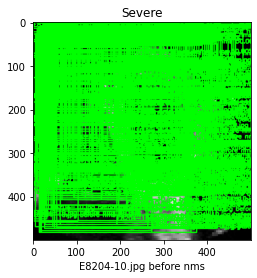

coaching! going for  1
using FAST


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


limiting boxes to  300
 Found  5375 boxes in  E8204-10.jpg after nms  for  Severe
 COmplete boxed image showing  5375  boxes


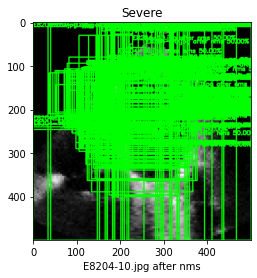

 STEP 7: box size 6130 Before nms to 5375  at threshold: 0.9999
for label:  Invisible
Cycling thorugh all  22 images for label:  Invisible
conducting NMS reductions in this set
switching to SS Quality
Run_SS: after SS:  6149  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6149 boxes in  BD123-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6149  boxes


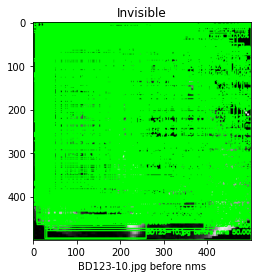

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5516 boxes in  BD123-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5516  boxes


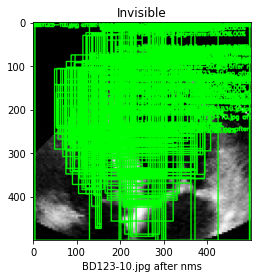

 STEP 7: box size 6149 Before nms to 5516  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  7631  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  7631 boxes in  20284-10.jpg before nms  for  Invisible
 COmplete boxed image showing  7631  boxes


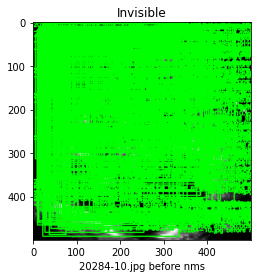

coaching! going for  1
using FAST
limiting boxes to  300
 Found  6846 boxes in  20284-10.jpg after nms  for  Invisible
 COmplete boxed image showing  6846  boxes


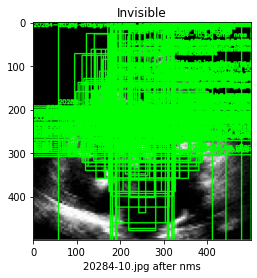

 STEP 7: box size 7631 Before nms to 6846  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  7920  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  7920 boxes in  905A7-10.jpg before nms  for  Invisible
 COmplete boxed image showing  7920  boxes


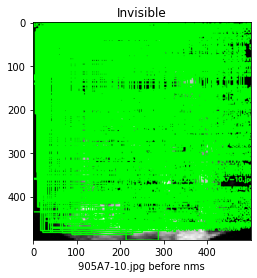

coaching! going for  1
using FAST
limiting boxes to  300
 Found  7155 boxes in  905A7-10.jpg after nms  for  Invisible
 COmplete boxed image showing  7155  boxes


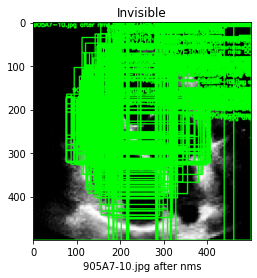

 STEP 7: box size 7920 Before nms to 7155  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5769  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5769 boxes in  FBD35-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5769  boxes


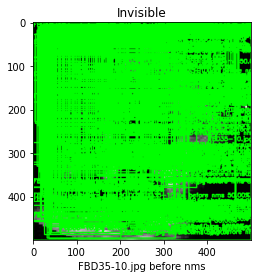

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5111 boxes in  FBD35-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5111  boxes


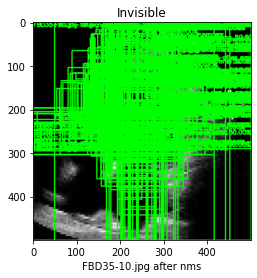

 STEP 7: box size 5769 Before nms to 5111  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6015  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6015 boxes in  6FDAF-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6015  boxes


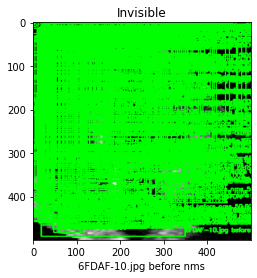

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5293 boxes in  6FDAF-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5293  boxes


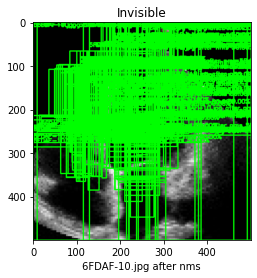

 STEP 7: box size 6015 Before nms to 5293  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  3995  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  3995 boxes in  861CA-10.jpg before nms  for  Invisible
 COmplete boxed image showing  3995  boxes


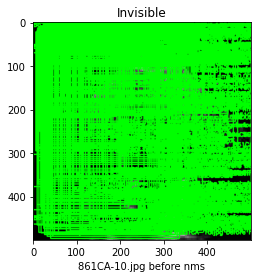

coaching! going for  1
using FAST
limiting boxes to  300
 Found  3427 boxes in  861CA-10.jpg after nms  for  Invisible
 COmplete boxed image showing  3427  boxes


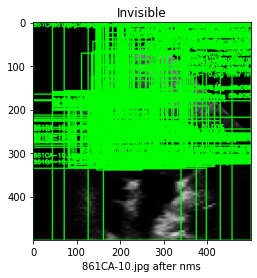

 STEP 7: box size 3995 Before nms to 3427  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5204  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5204 boxes in  97F96-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5204  boxes


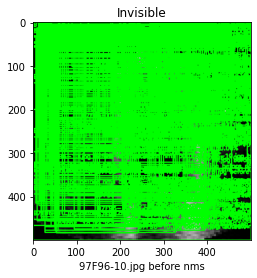

coaching! going for  1
using FAST
limiting boxes to  300
 Found  4505 boxes in  97F96-10.jpg after nms  for  Invisible
 COmplete boxed image showing  4505  boxes


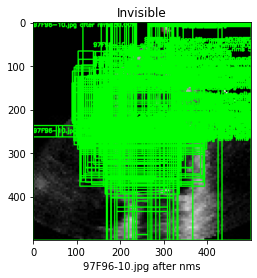

 STEP 7: box size 5204 Before nms to 4505  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6332  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6332 boxes in  F3D78-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6332  boxes


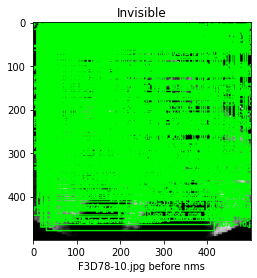

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5430 boxes in  F3D78-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5430  boxes


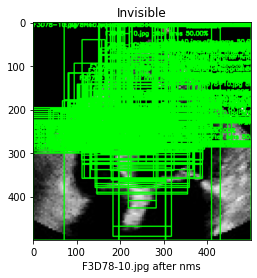

 STEP 7: box size 6332 Before nms to 5430  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6814  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6814 boxes in  DC6E8-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6814  boxes


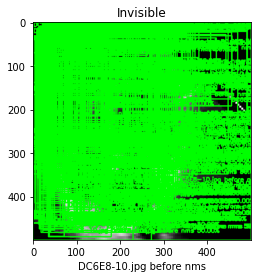

coaching! going for  1
using FAST
limiting boxes to  300
 Found  6196 boxes in  DC6E8-10.jpg after nms  for  Invisible
 COmplete boxed image showing  6196  boxes


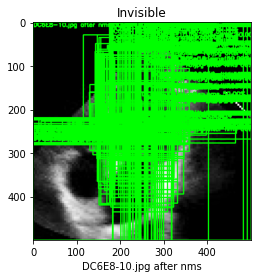

 STEP 7: box size 6814 Before nms to 6196  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5745  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5745 boxes in  E4011-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5745  boxes


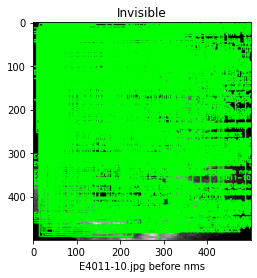

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5064 boxes in  E4011-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5064  boxes


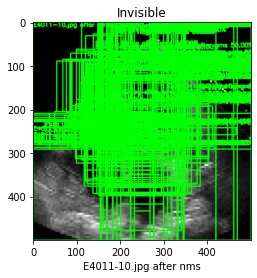

 STEP 7: box size 5745 Before nms to 5064  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5091  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5091 boxes in  BD7FC-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5091  boxes


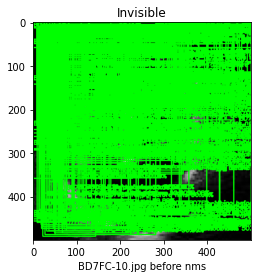

coaching! going for  1
using FAST
limiting boxes to  300
 Found  4523 boxes in  BD7FC-10.jpg after nms  for  Invisible
 COmplete boxed image showing  4523  boxes


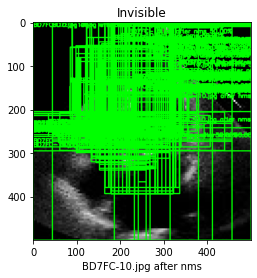

 STEP 7: box size 5091 Before nms to 4523  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6874  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6874 boxes in  592A2-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6874  boxes


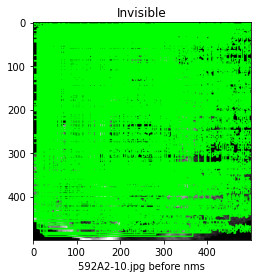

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5949 boxes in  592A2-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5949  boxes


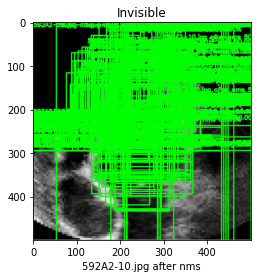

 STEP 7: box size 6874 Before nms to 5949  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5929  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5929 boxes in  CD966-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5929  boxes


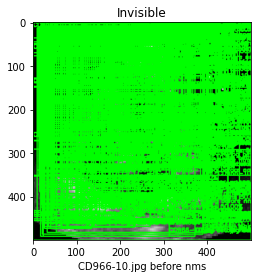

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5134 boxes in  CD966-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5134  boxes


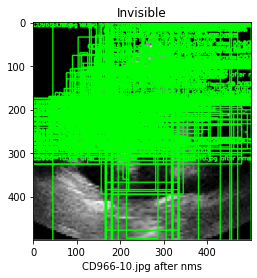

 STEP 7: box size 5929 Before nms to 5134  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5269  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5269 boxes in  CFBA4-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5269  boxes


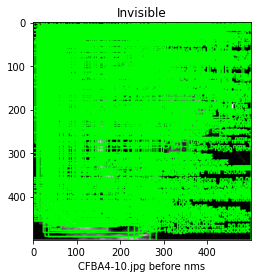

coaching! going for  1
using FAST
limiting boxes to  300
 Found  4353 boxes in  CFBA4-10.jpg after nms  for  Invisible
 COmplete boxed image showing  4353  boxes


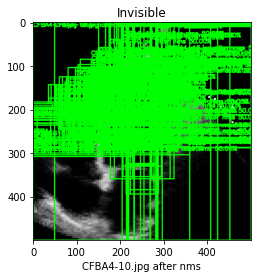

 STEP 7: box size 5269 Before nms to 4353  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  9745  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  9745 boxes in  F77D7-10.jpg before nms  for  Invisible
 COmplete boxed image showing  9745  boxes


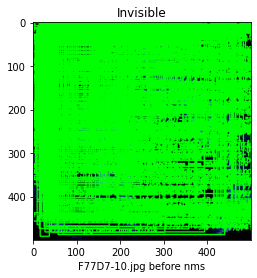

coaching! going for  1
using FAST
limiting boxes to  300
 Found  8803 boxes in  F77D7-10.jpg after nms  for  Invisible
 COmplete boxed image showing  8803  boxes


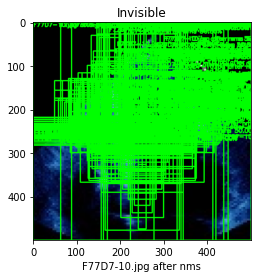

 STEP 7: box size 9745 Before nms to 8803  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  7516  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  7516 boxes in  C1A61-10.jpg before nms  for  Invisible
 COmplete boxed image showing  7516  boxes


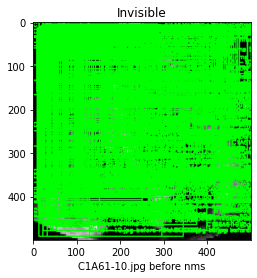

coaching! going for  1
using FAST
limiting boxes to  300
 Found  6634 boxes in  C1A61-10.jpg after nms  for  Invisible
 COmplete boxed image showing  6634  boxes


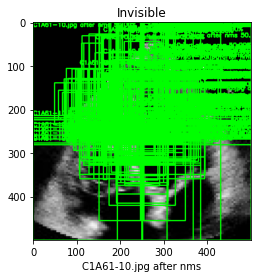

 STEP 7: box size 7516 Before nms to 6634  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6246  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6246 boxes in  E66B1-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6246  boxes


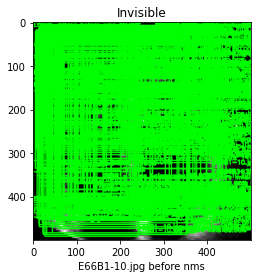

coaching! going for  1
using FAST
limiting boxes to  300
 Found  5532 boxes in  E66B1-10.jpg after nms  for  Invisible
 COmplete boxed image showing  5532  boxes


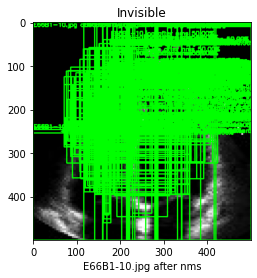

 STEP 7: box size 6246 Before nms to 5532  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  4150  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  4150 boxes in  DF8C9-10.jpg before nms  for  Invisible
 COmplete boxed image showing  4150  boxes


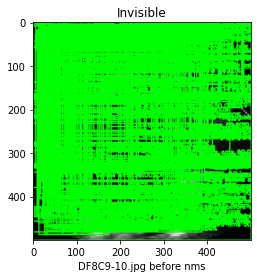

coaching! going for  1
using FAST
limiting boxes to  300
 Found  3612 boxes in  DF8C9-10.jpg after nms  for  Invisible
 COmplete boxed image showing  3612  boxes


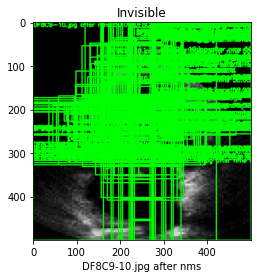

 STEP 7: box size 4150 Before nms to 3612  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  4126  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  4126 boxes in  C1D36-10.jpg before nms  for  Invisible
 COmplete boxed image showing  4126  boxes


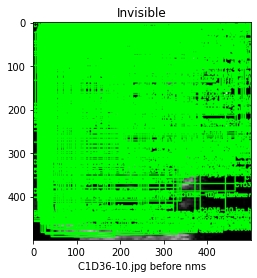

coaching! going for  1
using FAST
limiting boxes to  300
 Found  3544 boxes in  C1D36-10.jpg after nms  for  Invisible
 COmplete boxed image showing  3544  boxes


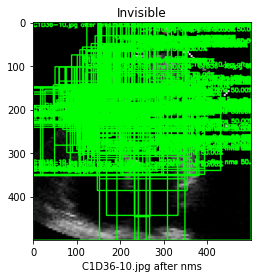

 STEP 7: box size 4126 Before nms to 3544  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  6854  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  6854 boxes in  AB842-10.jpg before nms  for  Invisible
 COmplete boxed image showing  6854  boxes


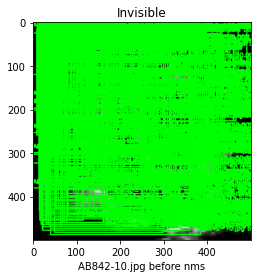

coaching! going for  1
using FAST
limiting boxes to  300
 Found  6140 boxes in  AB842-10.jpg after nms  for  Invisible
 COmplete boxed image showing  6140  boxes


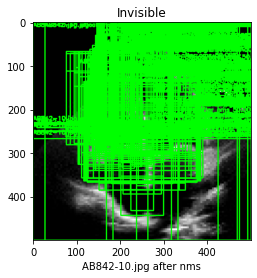

 STEP 7: box size 6854 Before nms to 6140  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  4076  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  4076 boxes in  0DB2D-10.jpg before nms  for  Invisible
 COmplete boxed image showing  4076  boxes


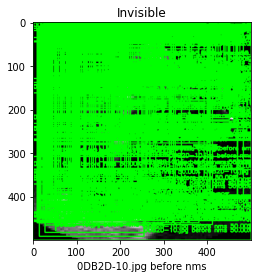

coaching! going for  1
using FAST
limiting boxes to  300
 Found  3578 boxes in  0DB2D-10.jpg after nms  for  Invisible
 COmplete boxed image showing  3578  boxes


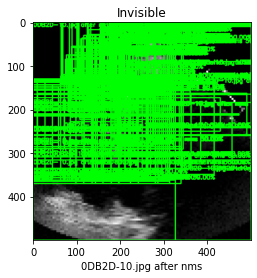

 STEP 7: box size 4076 Before nms to 3578  at threshold: 0.9999
switching to SS Quality
Run_SS: after SS:  5349  boxes
 Ovelap threahold =0.9999
limiting boxes to  300
 Found  5349 boxes in  D4AEB-10.jpg before nms  for  Invisible
 COmplete boxed image showing  5349  boxes


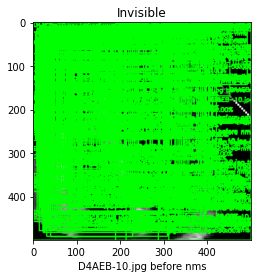

coaching! going for  1
using FAST
limiting boxes to  300
 Found  4508 boxes in  D4AEB-10.jpg after nms  for  Invisible
 COmplete boxed image showing  4508  boxes


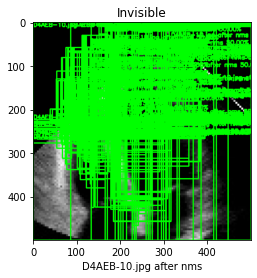

 STEP 7: box size 5349 Before nms to 4508  at threshold: 0.9999
done with label plot, processing   23  images
23 Records in image dictonary


In [29]:
STAGE="SEVEN"
MISSION=' RUN ss AND PLOT BOXS FOR FIRST 10 IMAGES IN EACH SEVERITY'
MISSION +=" \n RUN after nms \n"
MISSION +=" using NMS_FAST"
print ("CARDIAC PATERNS STAGE:", STAGE, " and \n", MISSION)
TRACE=True
LTEST=False
# get list of labels
# get list of jpg in each label
# runt through labels 
# plot first "n" in each label directory
# build total directory of all boxed images by annotaion name
EXP = True  # print control
CP_LABELS = []  # list of lbels
CP_IMAGES ={}  # dictionary of lists
CP_PROPOSALS = {}  # image boxed proposals. inexed by annotation
ECHOS= os.path.join ("/content","training-rcnn-keras","echos") # full path to echos directory containing labels and jpg files
lbls = os.listdir(ECHOS)  # list of labels
if EXP: print ("list of labels: ", lbls)
for l in lbls:
  CP_LABELS.append(l)  # add the label
  # get a list of files
  lbl_subs = os.path.join (ECHOS,l) # sub dir
  sub_list = os.listdir(lbl_subs) # list of files fo rthis label
  sl = len (sub_list)
  if EXP: print (sl, " files in label: ", l)
  #sub_files = os.listdir(sub_list) # the files in this subdirectory
  CP_IMAGES[l]= sub_list # files availavle at this label
# run through CP_IMAGES and do ss and plot
EACH_LABEL = 2 # imagaes per pass
DO_ALL     = True  # Do everything
WAIT_DISP  = True # hold up display till after nms
LTEST = False
nimage=0
if DO_ALL: 
  print (" Covering ALl images")
# create log
if DO_ALL:
  log,fd = create_log ()  # version 2 of log
  log.debug ("Created log")
for label in CP_IMAGES.keys():
  # get list
  # cycle through n in thi list
  #for i in range (0,EACH_LABEL):
    if EXP: 
      print ("for label: ", label)
      #pdb.set_trace()
    image_list =CP_IMAGES[label]  # list of image names
    lst_sz = len (image_list)
    if lst_sz<=0 : continue  # skip this loop
    if EACH_LABEL > lst_sz: 
      lst_=lst_sz
    else:
        lst_=EACH_LABEL
    if DO_ALL: lst_=lst_sz  # all of them in this label
    # cycle throug all imagaes for this label
    print ("Cycling thorugh all ", lst_sz, "images for label: ",label)
    cycle = 0
    TRACE=False
    NMS=True
    LTEST=False # override
    if NMS: 
      print ("conducting NMS reductions in this set")
      msg=" Conducting Non Maxium Supprssion on images in this set"
      lg(msg)
    for i in range (0,lst_):
      img_name = image_list[i]  # this file
      title = img_name
      img_path = os.path.join (ECHOS,label,img_name) # full path to image
      if TRACE: print ("cycle", cycle, "for ", title, " at: ", img_path)
      boxes,image = run_ss (img_path, title)
      if not WAIT_DISP: draw_ss (image,title,boxes,label) # print all
      if NMS: 
        proba =  None  #0.5 # what is this?  These are input proabailiiges [list]
        probs = 0.3  # thry this  idxs = probs in the algorithim
        overlapThresh=0.999 # return to standard try more VERY LOW nix most of them
        overlapThresh=0.9999  # almost 1 to elminiate marginal boxes 06-06-22
        msg=" Ovelap threahold ="+ str(overlapThresh)
        lg(msg)
        print (msg)
        tnms = title + " before nms"
        clone1=draw_ss (image, tnms, boxes, label)
        # Draw image before nms
        #if LTEST : pdb.set_trace()
        #print ("coaching! going for 1")
        #nt= input ("type 1 for fast, 2 for other")# doesnt work?
        nt="1"
        #nt = int(nmst)
        print ("coaching! going for ", nt)
        #boxIdxs = non_max_suppression2(boxes, proba, overlapThresh)  # note change in named parameter
        if nt=="1": 
          print ("using FAST")
          boxIdxs =non_max_suppression_fast(boxes, overlapThresh)
        elif nt=="2": 
          print ("using #2")
          boxIdxs =non_max_suppression2(boxes, overlapThresh)
        elif nt=='3':
          print ("using #1")
          boxIdxs =non_max_suppression1(boxes, overlapThresh)
        else:
          print ("NO OPTION from ", nt, " go fast")
          pdb.set_trace()
          boxIdxs =non_max_suppression_fast(boxes, overlapThresh)

        # Before NMS
        #tnms = title + " before nms"
        #clone1=draw_ss (image, tnms, boxes, label)
        # just draw the nms labeled boxes
        if LTEST: pdb.set_trace() # raw_ss witlll cycle through boxes
        #for i in boxIdxs:
        pnms = title + " after nms" #post_nms_title
        clone2=draw_ss (image, pnms, boxIdxs, label)
        anms=len(boxIdxs)
        bnms=len(boxes)
        msg=" STEP 7: box size "+str(bnms)+" Before nms to "+str(anms)
        msg+="  at threshold: "+str(overlapThresh)
        print (msg)
        lg(msg)
        iList=(title,clone1,clone2)
      #log.debug ("draw_SS for",title)
      msg=" Draw SS for "+str(title)
      #msg="drawng ss for "+str(title)
      #if LTEST: pdb.set_trace() # no
      CP_PROPOSALS[title]=(title,clone1,clone2)  # add record of frame+before and after nms
      if TRACE:print ("adding ",title, 'and before /ater nms image')
      lg(msg)
      #fd.write (msg)
      #log.info("draw selective search")
      nimage+=1
print ("done with label plot, processing  ", nimage, " images")
print (len(CP_PROPOSALS), "Records in image dictonary")
msg = "Done with label, plot processing for: "+str(nimage)+" images"
lg(msg)



 shape ()  len  23
E8204-10.jpg


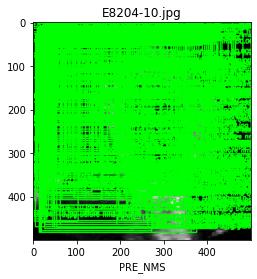

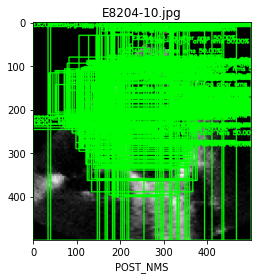

more cr = yes
BD123-10.jpg


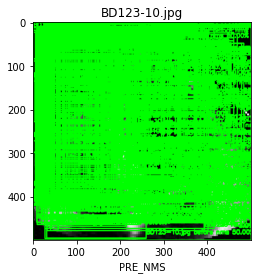

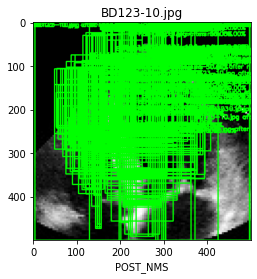

more cr = yesno
all done


In [30]:
STAGE = "EXTRA +"
MISSION = " show results"
##DEPRICTED
p = CP_PROPOSALS
print (" shape",np.shape(p), " len ", len(p))
#for i in range (0,len(p)):
for k in p.keys():
  title=p[k][0]
  print (title) # just the label
  pre_nms = p[k][1]
  pos_nms = p[k][2]
  plt_imshow2(title, pre_nms, "PRE_NMS")
  plt_imshow2(title, pos_nms,"POST_NMS")
  x=input ("more cr = yes")
  if x!="" :break
print ("all done")

In [31]:
STAGE="EIGHT"
MISSION=" Load the MobileNetV2 network, ensuring the head FC layer sets are let off"
print ("CARDIAC PATTERNS STAGE ", STAGE, " with ", MISSION)
msg = "CARDIAC PATTERNS STAGE "+ str( STAGE)+ " with "+ str( MISSION)
msg+=" Base model changed to baseodelT for Cardiac Patterns 05/24/22"
lg(msg)
# left off
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModelT = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
msg=" MobilenetV2 Input tesor: shape = (224,224,3) Check this with actual input"
print (msg)
lg(msg)
# construct the head of the model that will be placed on top of the
# the base model
headModelT = baseModelT.output   # for CP
headModelT = AveragePooling2D(pool_size=(7, 7))(headModelT)
headModelT = Flatten(name="flatten")(headModelT)
headModelT = Dense(128, activation="relu")(headModelT)
headModelT = Dropout(0.5)(headModelT)
headModelT = Dense(2, activation="softmax")(headModelT)
inetcfg=" MobileNetV2 confiuration, weights = 'imagenet' include_top=False"
hm="Layers of HEadMOdel = averagepoolng2D(size = 7,7) \n"
hm+=" Flatten \n Dense (128, activation=relu) \n Dropout (0.5)  \n Dense (2, activation=softmax)"
tmsg=inetcfg+hm
tmsg+=" Converted to headodelT for CP"
lg(tmsg) # log totoal configuraiton

# place the head FC model on top of the base model (this will become
# the actual model we will train)
modelT = Model(inputs=baseModelT.input, outputs=headModelT) # with Cp conversion

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModelT.layers:
	layer.trainable = False
msg = " CP stage Eight Updated to headModelT, modelT, etc. 05/24/22"

CARDIAC PATTERNS STAGE  EIGHT  with   Load the MobileNetV2 network, ensuring the head FC layer sets are let off
9412608/9406464 [==============================] - 0s 0us/step
 MobilenetV2 Input tesor: shape = (224,224,3) Check this with actual input


In [32]:
#from   training2.py import Model
# compile CARDIAC PATTERNS model
#CARDIAC PATTERNS 
LTEST=True
STAGE="NINE"
MISSSION= "COMPILE the Modelnetv2  Updated to modelT for CP"
#print ("CARDIAC PATTERNS  STAGE ",STAGE, " with ", MISSION)
#print("[INFO] compiling model...")
msg="CARDIAC PATTERNS  STAGE "+ str(STAGE )+" with "+ str (MISSION)
msg+="compiling model"
msg+=" Adam (lr=INIT_LR)"
lg(msg)
print (msg)
optT = Adam(lr=INIT_LR)
# From stage six: CP_trainX[i],"  ",CP_testX[i], " | ", CP_trainY, " ", CP_testY)
modelT.compile(loss="binary_crossentropy", optimizer=optT,
	metrics=["accuracy"],run_eagerly=True)  # added from train.py source
#converting to CP sets
# train the head of the network
print("[INFO] training head...")
msg= "[INFO] Training head with trainx: "+str(CP_trainX.shape)+ "trainY: "+str(CP_trainY.shape)
msg+=" \n CP_testX:"+str(CP_testX.shape)+" CP_testY:"+str( CP_testY.shape)
msg+=" batch size: "+ str(BS)
msg+=" validation_steps= "+str(len(CP_testX // BS))
lg(msg)
print (msg)
if LTEST: pdb.set_trace()
print (CP_trainX.shape, CP_trainY.shape, CP_testX.shape, CP_testY.shape)
H = modelT.fit(
	augT.flow(CP_trainX, CP_trainY, batch_size=BS),
	steps_per_epoch=len(CP_trainX) // BS,
	validation_data=(CP_testX, CP_testY),
	validation_steps=len(CP_testX) // BS,
	epochs=EPOCHS,verbose=3)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



CARDIAC PATTERNS  STAGE NINE with  Load the MobileNetV2 network, ensuring the head FC layer sets are let offcompiling model Adam (lr=INIT_LR)
[INFO] training head...
[INFO] Training head with trainx: (18, 224, 224, 3)trainY: (18, 2) 
 CP_testX:(5, 224, 224, 3) CP_testY:(5, 2) batch size: 4 validation_steps= 5
--Return--
> <ipython-input-32-687c7488bcf1>(27)<module>()->None
-> if LTEST: pdb.set_trace()
(Pdb) c



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



(18, 224, 224, 3) (18, 2) (5, 224, 224, 3) (5, 2)
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [33]:
# STANDARD CREATE model for next tage# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [34]:
# Standard compile model
# compile our model
print("[INFO] compiling standard model...")
opt = Adam(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
msg="Training MobileNetV2 Model.fit: \n"
msg+=" trainX, TrainY, batch siz: "+str(trainX.shape)+" "+str(trainY.shape)+" "+str(BS)
msg+="\n steps per epoch: "+str(len(trainX)//BS)
msg+=" \n valdation data (testX) (testY): "+str(testX.shape)+" "+str(testY.shape)
msg+=" \n validation_steps: "+str(len(testX)//BS)
msg+=" \n epochs "+ str(EPOCHS)
print (msg)
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)
print ("Completion of model.fit for stanard package")

[INFO] compiling standard model...
[INFO] training head...
Training MobileNetV2 Model.fit: 
 trainX, TrainY, batch siz: (3008, 224, 224, 3) (3008, 2) 4
 steps per epoch: 752 
 valdation data (testX) (testY): (752, 224, 224, 3) (752, 2) 
 validation_steps: 188 
 epochs 5
Epoch 1/5
752/752 [==============================] - 31s 42ms/step - loss: 0.0785 - accuracy: 0.9674 - val_loss: 0.0147 - val_accuracy: 0.9960
Epoch 2/5
752/752 [==============================] - 31s 41ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0064 - val_accuracy: 0.9973
Epoch 3/5
752/752 [==============================] - 31s 41ms/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 4/5
752/752 [==============================] - 31s 41ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0077 - val_accuracy: 0.9973
Epoch 5/5
752/752 [==============================] - 31s 41ms/step - loss: 0.0092 - accuracy: 0.9963 - val_loss: 0.0085 - val_accuracy: 0.9960
Completion of 

In [35]:
# CARDIAC PATTERENS make predictions on the testing set
STAGE= "TEN"
LTEST = True
# note creat own object MODEL
MISSION = "Make prediions using MobilnetV2 "
msg="CARDIAC PATTERNS STAGE: "+str(STAGE)+ " with: "+ str(MISSION)
lg(msg)
if LTEST: pdb.set_trace()
msg=" lb classes:"+str(lb.classes_)  #LabelBinarizer
msg+="\n CP_testX shape: "+str(CP_testX.shape)+ " and CP_testY: "+str(CP_testY.shape)
lg(msg)
print (msg)
print("[INFO] evaluating network...")
predIdxs = modelT.predict(CP_testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
print ("predIdxs: ", predIdxs)
# show a nicely formatted classification report
tg = ["Non-Visible","Normal","Mild","Severe","Endocarditis","Prosthetic"]
if TWOLABELS:
  # just use two labels
	dir_list = ["Invisible","Normal"]
	tg = dir_list # just these
target_names = tg	
# align with limited labeling?
#print(classification_report(CP_testY.argmax(axis=1), predIdxs,
#	target_names=lb.classes_))
if LTEST: pdb.set_trace()
if TRACE: print ("predIdxs: ", predIxs, " \n targt_names: ", target_names, " labels:", labels)
print(classification_report(CP_testY.argmax(axis=1), predIdxs,
	target_names=tg))  # adjusted for CP 06-06-22

--Return--
> <ipython-input-35-2662233cb2d0>(8)<module>()->None
-> if LTEST: pdb.set_trace()
(Pdb) l
  3  	LTEST = True
  4  	# note creat own object MODEL
  5  	MISSION = "Make prediions using MobilnetV2 "
  6  	msg="CARDIAC PATTERNS STAGE: "+str(STAGE)+ " with: "+ str(MISSION)
  7  	lg(msg)
  8  ->	if LTEST: pdb.set_trace()
  9  	msg=" lb classes:"+str(lb.classes_)  #LabelBinarizer
 10  	msg+="\n CP_testX shape: "+str(CP_testX.shape)+ " and CP_testY: "+str(CP_testY.shape)
 11  	lg(msg)
 12  	print (msg)
 13  	print("[INFO] evaluating network...")
(Pdb) print(classification_report(CP_testY.argmax(axis=1), predIdxs, 	target_names=tg))
*** NameError: name 'predIdxs' is not defined
(Pdb) c
 lb classes:['no_raccoon' 'raccoon']
 CP_testX shape: (5, 224, 224, 3) and CP_testY: (5, 2)
[INFO] evaluating network...
predIdxs:  [0 0 0 0 0]
--Return--
> <ipython-input-35-2662233cb2d0>(30)<module>()->None
-> if LTEST: pdb.set_trace()
(Pdb) print(classification_report(CP_testY.argmax(axis=1), predId

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Invisible       0.80      1.00      0.89         4
      Normal       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

(Pdb) c
              precision    recall  f1-score   support

   Invisible       0.80      1.00      0.89         4
      Normal       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#STANDARD BUILD MODEL
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [37]:
# make predictions on the testing set THIs is STANDARD SETUP
STAGE= "TEN_std"
MISSION = "Make predicions using MobilnetV2 "
LTEST=True
print("[INFO] evaluating network...")
msg=" Standard predictions using testX at Batch: "+str(testX.shape)+" "+str (BS)
print (msg)
if LTEST: pdb.set_trace()
predIdxs = model.predict(testX, batch_size=BS)
msg="predIdxs : "+str(len(predIdxs)) + "from testx"
msg+=" predIxs: "+str( predIdxs.shape)

for i in range (0,10):
	print (predIdxs[i])
	msg+=" "+str(predIdxs[i])+"\n"
print (msg)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
print ("predIdxs: ", predIdxs)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
 Standard predictions using testX at Batch: (752, 224, 224, 3) 4
--Return--
> <ipython-input-37-dafe5f42c0e1>(8)<module>()->None
-> if LTEST: pdb.set_trace()
(Pdb) c
[0.30998603 0.69001395]
[0.5676868  0.43231317]
[0.155419   0.84458095]
[0.6865776 0.3134224]
[0.4725456  0.52745444]
[0.51223713 0.48776293]
[0.4906019 0.5093981]
[0.4955672  0.50443286]
[0.5021941  0.49780586]
[0.78139687 0.21860315]
predIdxs : 752from testx predIxs: (752, 2) [0.30998603 0.69001395]
 [0.5676868  0.43231317]
 [0.155419   0.84458095]
 [0.6865776 0.3134224]
 [0.4725456  0.52745444]
 [0.51223713 0.48776293]
 [0.4906019 0.5093981]
 [0.4955672  0.50443286]
 [0.5021941  0.49780586]
 [0.78139687 0.21860315]

predIdxs:  [1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1

In [38]:
STAGE= "11 Standarad"
MISSION = " Serialize model to disk"
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save(config.MODEL_PATH, save_format="h5")

# serialize the label encoder to disk
print("[INFO] saving label encoder...")
f = open(config.ENCODER_PATH, "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] saving mask detector model...
[INFO] saving label encoder...


In [39]:
STAGE= "ELEVEN"
MISSION = " Serialize CARDIAC PATTERNS model to disk"
# serialize the model to disk
print("[INFO] saving CP mask detector model...")
msg= " CARDIAC PAtterNS "+str(STAGE)+" "+str(MISSION)+ "saving to disk"
lg(msg)
print (msg)
modelT.save(config.MODELT_PATH, save_format="h5")

# serialize the label encoder to disk
print("[INFO] saving label encoder...")
f = open(config.ENCODERT_PATH, "wb")
f.write(pickle.dumps(lb))
f.close()
msg= "Cardiac Patterns "+str(STAGE)+ " "+str(MISSION)
msg+= " \n Serialized saved to "+str(config.MODELT_PATH)+ " Encoder saved to "+str(config.ENCODERT_PATH)
lg(msg)
print (msg)

[INFO] saving CP mask detector model...
 CARDIAC PAtterNS ELEVEN  Serialize CARDIAC PATTERNS model to disksaving to disk
[INFO] saving label encoder...
Cardiac Patterns ELEVEN  Serialize CARDIAC PATTERNS model to disk 
 Serialized saved to echo_detector.h5 Encoder saved to echo_encoder.pickle


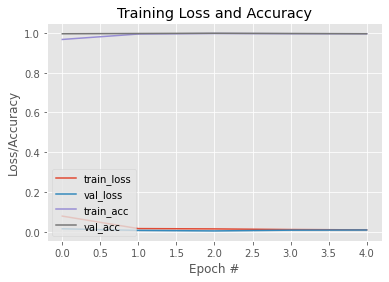

In [40]:
STAGE="12 Standard"
MISSION= "plot training loss and accueay"
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
plt.show()

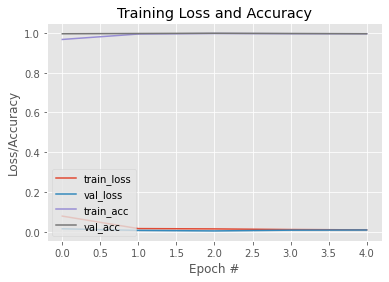

In [41]:
STAGE="TWELVE" # CARDIAC PATTENS
MISSION= "plot training loss and accueay"
# plot the training loss and accuracy
# note: H = model.fit
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
plt.show()

### Putting the pieces together: Implementing our R-CNN object detection inference script

In [42]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/raccoon_01.jpg"
}

In [43]:
# load the our fine-tuned model and label binarizer from disk
print("[INFO] loading model and label binarizer...")
model = load_model(config.MODEL_PATH)
lb = pickle.loads(open(config.ENCODER_PATH, "rb").read())

# load the input image from disk
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)

# run selective search on the image to generate bounding box proposal
# regions
print("[INFO] running selective search...")
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
#ss.switchToSelectiveSearchFast()
print ("switching to SS Quality")
ss.switchToSelectiveSearchQuality ()
rects = ss.process()
print ("after SS: ", rects)

[INFO] loading model and label binarizer...
[INFO] running selective search...
switching to SS Quality
after SS:  [[  0   0 180 158]
 [276 122  50  34]
 [223  80 210 253]
 ...
 [183   0 317 333]
 [224  55 214 278]
 [224 106 214 227]]


In [44]:
# initialize the list of region proposals that we'll be classifying
# along with their associated bounding boxes
proposals = []
boxes = []
print ("Size of rects: ", len(rects))
# loop over the region proposal bounding box coordinates generated by
# running selective search
for (x, y, w, h) in rects[:config.MAX_PROPOSALS_INFER]:
	# extract the region from the input image, convert it from BGR to
	# RGB channel ordering, and then resize it to the required input
	# dimensions of our trained CNN
	roi = image[y:y + h, x:x + w]
	roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
	roi = cv2.resize(roi, config.INPUT_DIMS,
		interpolation=cv2.INTER_CUBIC)

	# further preprocess the ROI
	roi = img_to_array(roi)
	roi = preprocess_input(roi)

	# update our proposals and bounding boxes lists
	proposals.append(roi)
	boxes.append((x, y, x + w, y + h))

Size of rects:  1887


In [45]:
# convert the proposals and bounding boxes into NumPy arrays
proposals = np.array(proposals, dtype="float32")
boxes = np.array(boxes, dtype="int32")
print("[INFO] proposal shape: {}".format(proposals.shape))

# classify each of the proposal ROIs using fine-tuned model
print("[INFO] classifying proposals...")
proba = model.predict(proposals)

[INFO] proposal shape: (200, 224, 224, 3)
[INFO] classifying proposals...


In [46]:
# find the index of all predictions that are positive for the
# "raccoon" class
print("[INFO] applying NMS...")
labels = lb.classes_[np.argmax(proba, axis=1)]
idxs = np.where(labels == "raccoon")[0]

# use the indexes to extract all bounding boxes and associated class
# label probabilities associated with the "raccoon" class
boxes = boxes[idxs]
proba = proba[idxs][:, 1]

# further filter indexes by enforcing a minimum prediction
# probability be met
idxs = np.where(proba >= config.MIN_PROBA)
boxes = boxes[idxs]
proba = proba[idxs]

[INFO] applying NMS...


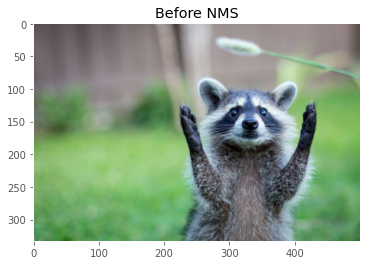

In [47]:
# clone the original image so that we can draw on it
clone = image.copy()

# loop over the bounding boxes and associated probabilities
for (box, prob) in zip(boxes, proba):
	# draw the bounding box, label, and probability on the image
	(startX, startY, endX, endY) = box
	cv2.rectangle(clone, (startX, startY), (endX, endY),
		(0, 255, 0), 2)
	y = startY - 10 if startY - 10 > 10 else startY + 10
	text= "Raccoon: {:.2f}%".format(prob * 100)
	cv2.putText(clone, text, (startX, y),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# show the output after *before* running NMS
plt_imshow("Before NMS", clone)

STAGE= "Six - Special stage for bounding boxes"
MISSION= " Run selective search and disply boxes "
print ("THIS IS CARDIAC PATTERNS STAGE :",STAGE, " ", MISSION)

###Plot the bounding boxes for an image ###

def plot_box (IMAGE, BOXES):
# image is jpg image
# BOXES = list of box dimensons
# prob = fixed at 0.5
# clone the original image so that we can draw on 
  image = IMAGE
  boxes = BOXES  # local
  nbox  = len (boxes)
  print ("found ", nbox, "boxes )
  clone = image.copy()
  prob = 0.5
  # loop over the bounding boxes and associated probabilities
  #for (box, prob) in zip(boxes, proba):
  thisbox = 0 # count
  for box in boxes:
	  # draw the bounding box, label, and probability on the image
	  (startX, startY, endX, endY) = box
	  cv2.rectangle(clone, (startX, startY), (endX, endY),
		  (0, 255, 0), 2)
	  y = startY - 10 if startY - 10 > 10 else startY + 10
	  text= "Raccoon: {:.2f}%".format(prob * 100)
	  cv2.putText(clone, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2) ###HERE
    thisbox +=1
  # show the output after *before* running NMS
  plt_imshow("Before NMS", clone)
  print ( nbox, " boxes plotted")
  return

  



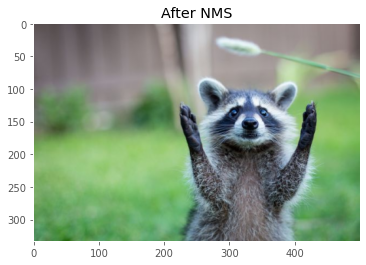

In [48]:
# run non-maxima suppression on the bounding boxes
boxIdxs = non_max_suppression(boxes, proba)

# loop over the bounding box indexes
for i in boxIdxs:
	# draw the bounding box, label, and probability on the image
	(startX, startY, endX, endY) = boxes[i]
	cv2.rectangle(image, (startX, startY), (endX, endY),
		(0, 255, 0), 2)
	y = startY - 10 if startY - 10 > 10 else startY + 10
	text= "Raccoon: {:.2f}%".format(proba[i] * 100)
	cv2.putText(image, text, (startX, y),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# show the output image *after* running NMS
plt_imshow("After NMS", image)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*R-CNN object detection with Keras, TensorFlow, and Deep Learning*](https://www.pyimagesearch.com/2020/07/13/r-cnn-object-detection-with-keras-tensorflow-and-deep-learning/) published on 2020-07-13.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```